# **Activity Detection**

data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

*Przyspieszenie (Accelerometer)*
- Accelerometer_z: Przyspieszenie wzdłuż osi Z.
- Accelerometer_y: Przyspieszenie wzdłuż osi Y.
- Accelerometer_x: Przyspieszenie wzdłuż osi X.

*Grawitacja (Gravity)*
- Gravity_z: Składowa wektora grawitacji wzdłuż osi Z.
- Gravity_y: Składowa wektora grawitacji wzdłuż osi Y.
- Gravity_x: Składowa wektora grawitacji wzdłuż osi X.

*Żyroskop (Gyroscope)*
- Gyroscope_z: Prędkość kątowa wokół osi Z.
- Gyroscope_y: Prędkość kątowa wokół osi Y.
- Gyroscope_x: Prędkość kątowa wokół osi X.

*Lokalizacja (Location)*
- Location_bearingAccuracy: Dokładność kierunku (azymutu) w lokalizacji.
- Location_speedAccuracy: Dokładność pomiaru prędkości w lokalizacji.
- Location_verticalAccuracy: Dokładność pomiaru wysokości (altitude) w lokalizacji.
- Location_horizontalAccuracy: Dokładność pomiaru szerokości i długości geograficznej.
- Location_speed: Prędkość w lokalizacji.
- Location_bearing: Kierunek (azymut) w lokalizacji.
- Location_altitude: Wysokość n.p.m. w lokalizacji.
- Location_longitude: Długość geograficzna w lokalizacji.
- Location_latitude: Szerokość geograficzna w lokalizacji.

*GPS (LocationGps)*
- LocationGps_bearingAccuracy: Dokładność kierunku (azymutu) uzyskana z GPS.
- LocationGps_speedAccuracy: Dokładność pomiaru prędkości uzyskana z GPS.
- LocationGps_verticalAccuracy: Dokładność pomiaru wysokości uzyskana z GPS.
- LocationGps_horizontalAccuracy: Dokładność pomiaru szerokości i długości geograficznej uzyskana z GPS.
- LocationGps_speed: Prędkość uzyskana z GPS.
- LocationGps_bearing: Kierunek (azymut) uzyskany z GPS.
- LocationGps_altitude: Wysokość n.p.m. uzyskana z GPS.
- LocationGps_longitude: Długość geograficzna uzyskana z GPS.
- LocationGps_latitude: Szerokość geograficzna uzyskana z GPS.

*Lokalizacja Sieciowa (LocationNetwork)*
- LocationNetwork_bearingAccuracy: Dokładność kierunku (azymutu) uzyskana z sieci.
- LocationNetwork_speedAccuracy: Dokładność pomiaru prędkości uzyskana z sieci.
- LocationNetwork_verticalAccuracy: Dokładność pomiaru wysokości uzyskana z sieci.
- LocationNetwork_horizontalAccuracy: Dokładność pomiaru szerokości i długości geograficznej uzyskana z sieci.
- LocationNetwork_speed: Prędkość uzyskana z sieci.
- LocationNetwork_bearing: Kierunek (azymut) uzyskany z sieci.
- LocationNetwork_altitude: Wysokość n.p.m. uzyskana z sieci.
- LocationNetwork_longitude: Długość geograficzna uzyskana z sieci.
- LocationNetwork_latitude: Szerokość geograficzna uzyskana z sieci.

*Magnetometr (Magnetometer)*
- Magnetometer_z: Natężenie pola magnetycznego wzdłuż osi Z.
- Magnetometer_y: Natężenie pola magnetycznego wzdłuż osi Y.
- Magnetometer_x: Natężenie pola magnetycznego wzdłuż osi X.

*Orientacja (Orientation)*
- Orientation_qz: Składowa Z kwaternionu reprezentującego orientację.
- Orientation_qy: Składowa Y kwaternionu reprezentującego orientację.
- Orientation_qx: Składowa X kwaternionu reprezentującego orientację.
- Orientation_qw: Składowa W kwaternionu reprezentującego orientację.
- Orientation_roll: Kąt przechylenia (roll) orientacji.
- Orientation_pitch: Kąt pochylenia (pitch) orientacji.
- Orientation_yaw: Kąt odchylenia (yaw) orientacji.

*Krokomierz (Pedometer)*
- Pedometer_steps: Liczba kroków zarejestrowanych przez krokomierz.

*Całkowite Przyspieszenie (TotalAcceleration)*
- TotalAcceleration_z: Całkowite przyspieszenie wzdłuż osi Z.
- TotalAcceleration_y: Całkowite przyspieszenie wzdłuż osi Y.
- TotalAcceleration_x: Całkowite przyspieszenie wzdłuż osi X.

### Imports

In [16]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split


### Reading csv

Considering only one activity now because there are the same csv files everywhere. Annotation is empty csv (in all activities) so leaving it.

In [2]:
file_paths = [
    ('..//data//Cycling-2023-09-14_06-22-31//Accelerometer.csv', 'Accelerometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gravity.csv', 'Gravity'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gyroscope.csv', 'Gyroscope'),
    ('..//data//Cycling-2023-09-14_06-22-31//Location.csv', 'Location'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationGps.csv', 'LocationGps'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationNetwork.csv', 'LocationNetwork'),
    ('..//data//Cycling-2023-09-14_06-22-31//Magnetometer.csv', 'Magnetometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Metadata.csv', 'Metadata'),
    ('..//data//Cycling-2023-09-14_06-22-31//Orientation.csv', 'Orientation'),
    ('..//data//Cycling-2023-09-14_06-22-31//Pedometer.csv', 'Pedometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//TotalAcceleration.csv', 'TotalAcceleration')
]

In [3]:
dataframes = {name: pd.read_csv(path) for path, name in file_paths}

In [4]:
for name,df in dataframes.items():
    print(df.shape)

(71461, 5)
(71461, 5)
(71847, 5)
(230, 11)
(181, 11)
(17, 11)
(9037, 5)
(1, 10)
(71461, 9)
(32, 3)
(71456, 5)


In [5]:
def print_info(df,name):
        print("=====================================================================================================\n\n")
        print(f"{name} - below\n")
        print("=====================================================================================================\n\n")
        print(df.head())
        print("\n")
        print(df.info())

In [6]:
for name,df in dataframes.items():
    print_info(df,name)



Accelerometer - below



                  time  seconds_elapsed         z         y         x
0  1694672551573238300         0.121238  0.112874 -0.020792  0.156903
1  1694672551575757300         0.123757  0.235006 -0.003417  0.169683
2  1694672551578276400         0.126276  0.223140 -0.081017  0.135991
3  1694672551580795600         0.128796  0.191143 -0.067305  0.127650
4  1694672551583314400         0.131314  0.076245 -0.029743  0.083652


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71461 entries, 0 to 71460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             71461 non-null  int64  
 1   seconds_elapsed  71461 non-null  float64
 2   z                71461 non-null  float64
 3   y                71461 non-null  float64
 4   x                71461 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB
None


Gravity - below



                  time  seconds_elapsed      

In [7]:
dataframes.pop('Metadata')

version device name  recording epoch time       recording time  \
0        3     CPH2399         1694672551452  2023-09-14_06-22-31   

  recording timezone platform appVersion  \
0       Europe/Paris  android     1.20.0   

                              device id  \
0  c8dd5094-d4bd-47e1-b2c0-cc4205c1707a   

                                             sensors           sampleRateMs  
0  Accelerometer|Gravity|Gyroscope|Orientation|Ma...  0|0|0|0|0|0|10||0|0|0

We decided to not consider Metadata in further analysis due to lack of the importance.

Now we can merge all csv files into one dataframe. We will use the timestamp as the index (so we don't need secodns_elapsed column - we won't include it). As we said we will not include Metadata and Annotation.

In [8]:
sciezka = '..//data//'
zawartosc = os.listdir(sciezka)

In [9]:
# Ścieżka do katalogu głównego
sciezka = '..//data//'

# Wylistowanie wszystkich folderów w głównym katalogu
zawartosc = [folder for folder in os.listdir(sciezka) if os.path.isdir(os.path.join(sciezka, folder))]

for folder in zawartosc:
    
    #sciezki do nowego folderu w ktorym bedziemy zapisywać wyczyszczone dane
    sciezka_do_nowego_folderu = '..//cleared_data//'
    
    pelna_sciezka_do_nowego_folderu = os.path.join(sciezka_do_nowego_folderu, folder)
    os.makedirs(pelna_sciezka_do_nowego_folderu, exist_ok=True)
    # Pełna ścieżka do folderu
    pelna_sciezka_folderu = os.path.join(sciezka, folder)
    
    # Wylistowanie wszystkich plików w folderze
    f = os.listdir(pelna_sciezka_folderu)
    
    for plik in f:
        pelna_sciezka_pliku = os.path.join(pelna_sciezka_folderu, plik)
        
        # Sprawdzenie, czy plik nie jest pusty przed wczytaniem
        if os.path.getsize(pelna_sciezka_pliku) > 0:
            try:
                # Próba wczytania pliku CSV
                df = pd.read_csv(pelna_sciezka_pliku)
                if 'time' in df.columns:
                    df['time'] = pd.to_datetime(df['time'])
                else:
                    continue
                print(f'Wczytano plik: {pelna_sciezka_pliku}')
                if 'seconds_elapsed' in df.columns:
                    df = df.drop(columns=['seconds_elapsed'])
                    df.to_csv(pelna_sciezka_do_nowego_folderu+'//'+plik, index=False)
            except pd.errors.EmptyDataError:
                print(f'Plik {pelna_sciezka_pliku} jest pusty lub nie ma kolumn do sparsowania.')
        else:
            print(f'Plik {pelna_sciezka_pliku} jest pusty.')


Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Accelerometer.csv
Plik ..//data//Cycling-2023-09-14_06-22-31\Annotation.csv jest pusty.
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Gravity.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Gyroscope.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Location.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\LocationGps.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\LocationNetwork.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Magnetometer.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Orientation.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Pedometer.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\TotalAcceleration.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-33-47\Accelerometer.csv
Plik ..//data//Cycling-2023-09-14_06-33-47\Annotation.csv jest pusty.
Wczytano plik: ..//data//Cycling-2023-09-14_06-33-47\Gravity.csv
Wczytano plik: ..//data//Cycling

In [10]:
folder_path = '../cleared_data'
folders = os.listdir(folder_path)

for folder in folders:
    one_activity_path = os.path.join(folder_path, folder)
    print("Files in", folder + ":")
    print(os.listdir(one_activity_path))
    print()

i = 1
for dir in folders:
    activity = dir.split("-")[0]

    folder = os.path.join(folder_path, dir)

    file_list = [f for f in os.listdir(folder) if f.endswith('.csv')]

    result = pd.DataFrame({'time': []})
    
    

    for file_path in file_list:
        file = os.path.splitext(os.path.basename(file_path))[0]
        if file == "Annotation" or file == "Metadata":
            continue
        file_name = file + "_" + str(i)

        file_data = pd.read_csv(os.path.join(folder, file_path))

        file_data['time'] = pd.to_datetime(file_data['time'])
        
        # Rename columns except 'time'
        file_data = file_data.rename(columns={col: file + "_" + col if col != 'time' else col for col in file_data.columns})

        if result.empty:
            result = file_data
        else:
            # Perform fuzzy join on 'time' column
            result = pd.merge_asof(result.sort_values('time'), file_data.sort_values('time'), on='time', direction='nearest')

    result.to_csv(f'../merged_data/{activity}_{i}.csv', index=False)
    i += 1

Files in Cycling-2023-09-14_06-22-31:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-33-47:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-47-00:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_07-43-07:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_09-25-09:
['Accelerometer.csv', 'Gravity.csv

Now we are going to merge all activities into one big csv file

### Merging

In [11]:
cycling_1 = pd.read_csv('..//merged_data//Cycling_1.csv')
cycling_2 = pd.read_csv('..//merged_data//Cycling_2.csv')
cycling_3 = pd.read_csv('..//merged_data//Cycling_3.csv')
cycling_4 = pd.read_csv('..//merged_data//Cycling_4.csv')
cycling_5 = pd.read_csv('..//merged_data//Cycling_5.csv')
cycling_6 = pd.read_csv('..//merged_data//Cycling_6.csv')
cycling_7 = pd.read_csv('..//merged_data//Cycling_7.csv')
sitting_8 = pd.read_csv('..//merged_data//Sitting_8.csv')
sitting_9 = pd.read_csv('..//merged_data//Sitting_9.csv')
sitting_10 = pd.read_csv('..//merged_data//Sitting_10.csv')
walking_11 = pd.read_csv('..//merged_data//Walking_11.csv')
walking_12 = pd.read_csv('..//merged_data//Walking_12.csv')

In [12]:
cycling_1['TYPE'] = 'Cycling'
cycling_2['TYPE'] = 'Cycling'
cycling_3['TYPE'] = 'Cycling'
cycling_4['TYPE'] = 'Cycling'
cycling_5['TYPE'] = 'Cycling'
cycling_6['TYPE'] = 'Cycling'
cycling_7['TYPE'] = 'Cycling'
sitting_8['TYPE'] = 'Sitting'
sitting_9['TYPE'] = 'Sitting'
sitting_10['TYPE'] = 'Sitting'
walking_11['TYPE'] = 'Walking'
walking_12['TYPE'] = 'Walking'

In [13]:
cyclings = [
    cycling_1,cycling_2,cycling_3,cycling_4,cycling_5,cycling_6,cycling_7
]
sittings = [
    sitting_8,sitting_9,sitting_10
]
walkings = [
    walking_11,walking_12
]
df_cyclings = pd.concat(cyclings, axis=0)
df_cyclings.reset_index(drop=True, inplace=True)

df_sittings = pd.concat(sittings, axis=0)
df_sittings.reset_index(drop=True, inplace=True)

df_walkings = pd.concat(walkings, axis=0)
df_walkings.reset_index(drop=True, inplace=True)

datasets = [df_cyclings,df_sittings,df_walkings]
df_original = pd.concat(datasets, axis=0)
df_original.reset_index(drop=True, inplace=True)

In [14]:
df_original.head()

time  Accelerometer_z  Accelerometer_y  \
0  2023-09-14 06:22:31.573238300         0.112874        -0.020792   
1  2023-09-14 06:22:31.575757300         0.235006        -0.003417   
2  2023-09-14 06:22:31.578276400         0.223140        -0.081017   
3  2023-09-14 06:22:31.580795600         0.191143        -0.067305   
4  2023-09-14 06:22:31.583314400         0.076245        -0.029743   

   Accelerometer_x  Gravity_z  Gravity_y  Gravity_x  Gyroscope_z  Gyroscope_y  \
0         0.156903   8.257127   5.262842   0.541047    -0.113575     0.065037   
1         0.169683   8.254994   5.266468   0.538318    -0.108350     0.049087   
2         0.135991   8.252911   5.269967   0.536009    -0.107250     0.024612   
3         0.127650   8.250857   5.273355   0.534300    -0.105050    -0.006187   
4         0.083652   8.248755   5.276743   0.533298    -0.107250    -0.031762   

   Gyroscope_x  ...  Orientation_qx  Orientation_qw  Orientation_roll  \
0     0.172425  ...        0.261542        0.852361         -0.065428   
1     0.170363  ...        0.261673        0.852358         -0.065115   
2     0.168162  ...        0.261808        0.852357         -0.064853   
3     0.165000  ...        0.261953        0.852359         -0.064663   
4     0.162800  ...        0.262116        0.852364         -0.064558   

   Orientation_pitch  Orientation_yaw  Pedometer_steps  TotalAcceleration_z  \
0          -0.566475        -0.973963                0             8.370001   
1          -0.566913        -0.973670                0             8.490001   
2          -0.567336        -0.973392                0             8.476050   
3          -0.567746        -0.973121                0             8.442000   
4          -0.568155        -0.972857                0             8.325001   

   TotalAcceleration_y  TotalAcceleration_x     TYPE  
0              5.24205              0.69795  Cycling  
1              5.26305              0.70800  Cycling  
2              5.18895              0.67200  Cycling  
3              5.20605              0.66195  Cycling  
4              5.24700              0.61695  Cycling  

[5 rows x 52 columns]

In [15]:
df_original.to_csv('../final_data/merged_data.csv', index=False)

### Splitting into train, test and valid

In [18]:
activities = pd.read_csv('../final_data/merged_data.csv')
x_train_valid, x_test, y_train_valid, y_test = train_test_split(
    activities.drop(columns=['TYPE']), # X
    activities['TYPE'], # y
    test_size=0.3, random_state=42)
x_train_valid.shape, y_train_valid.shape, x_test.shape, y_test.shape 

((1942857, 51), (1942857,), (832654, 51), (832654,))

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, # X
    y_train_valid, # y
    test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((1359999, 51), (1359999,), (582858, 51), (582858,))

### saving to files


In [20]:
x_train.to_csv("..//final_data//x_train.csv", index=False)
y_train.to_csv("..//final_data//y_train.csv", index=False)
x_valid.to_csv("..//final_data//x_valid.csv", index=False)
y_valid.to_csv("..//final_data//y_valid.csv", index=False)
x_test.to_csv("..//final_data//x_test.csv", index=False)
y_test.to_csv("..//final_data//y_test.csv", index=False)

From now we start EDA on x_train and y_train 

In [5]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split


### Reading files

In [6]:
x_train = pd.read_csv("..//final_data//x_train.csv")
y_train = pd.read_csv("..//final_data//y_train.csv")
x_valid = pd.read_csv("..//final_data//x_valid.csv")
y_valid = pd.read_csv("..//final_data//y_valid.csv")

In [ ]:
x_train.head()

time  Gravity_z  Gravity_y  Gravity_x  \
0  2023-09-16 07:45:34.982948600  -3.958695  -8.922360   0.943744   
1  2023-09-16 07:52:23.355688700  -6.937983  -6.843303   1.097270   
2  2023-09-14 06:25:08.544251100  -7.694859  -4.960746   3.514330   
3  2023-09-14 21:56:43.907852000   0.054078  -9.803289   0.250952   
4  2023-10-18 09:13:22.445822500  -7.931999   0.020569   5.766574   

   Magnetometer_z  Magnetometer_y  Magnetometer_x  \
0       22.256250       40.387501      -22.518751   
1       37.912502       24.806252      -19.612501   
2       27.018751       21.787500        3.356250   
3       28.237501       39.487503       -2.943750   
4       31.631250      -17.268751      -35.306252   

   LocationGps_bearingAccuracy  LocationGps_speedAccuracy  \
0                     9.100000                        1.3   
1                    54.799999                        1.7   
2                    32.000000                        1.0   
3                    45.200001                        1.5   
4                          NaN                        NaN   

   LocationGps_verticalAccuracy  ...  Accelerometer_z  Accelerometer_y  \
0                     23.700001  ...         0.457695         1.735410   
1                     14.300000  ...         1.252982        -0.156747   
2                     11.800000  ...         1.125909         0.606696   
3                     12.500000  ...        -2.053128        -2.470761   
4                           NaN  ...         0.052949         0.009431   

   Accelerometer_x  Orientation_qz  Orientation_qy  Orientation_qx  \
0        -0.974794       -0.368572        0.497810       -0.673472   
1         0.180731       -0.203575        0.363383       -0.849604   
2        -0.363280        0.101127       -0.757338       -0.564513   
3         0.251098        0.033860       -0.053270       -0.704380   
4        -0.014524        0.298596       -0.242010        0.919728   

   Orientation_qw  Orientation_roll  Orientation_pitch  Orientation_yaw  
0        0.403454         -2.910518           1.144221        -2.017715  
1        0.323548         -2.986338           0.772220        -2.396486  
2        0.312310         -2.712544           0.530287         1.162904  
3        0.707011         -1.497754           1.543099         1.374443  
4        0.079823         -2.513143          -0.002305        -2.626244  

[5 rows x 51 columns]

In [2]:
y_train.head()

NameError: name 'y_train' is not defined

In [3]:
x_valid.head()

NameError: name 'x_valid' is not defined

In [4]:
y_valid.head()

NameError: name 'y_valid' is not defined

### Take a look at sensors in our training dataset    

Accelerometer - important in movement analysis

Annotation - deleted - empty

Gravity - skipped - unnsecessary (same value) - proven below

In [7]:
np.sqrt(x_train['Gravity_x'] ** 2 + x_train['Gravity_y'] ** 2 + x_train['Gravity_z'] ** 2).describe()

count    602547.000000
mean          9.806651
std           0.000002
min           9.806641
25%           9.806650
50%           9.806651
75%           9.806652
max           9.806659
dtype: float64

Gyroscope - important same as accelerometer

Location, LocationGPS, LocationNetwork - at this moment it seems to be important

Magnetometer - important

Metadata - not included

Orientation - we dont know yet

Pedometer - number of steps (it is in cycling) - important

TotalAcceleration - (Accelerometer + Gravity =?= TotalAcceleration) (HYPOTHESIS) - important 99%

In [8]:
tmp = pd.DataFrame({
        'x' : abs(x_train['Accelerometer_x'] + x_train['Gravity_x'] - x_train['TotalAcceleration_x']), 
        'y' : abs(x_train['Accelerometer_y'] + x_train['Gravity_y'] - x_train['TotalAcceleration_y']),
        'z' : abs(x_train['Accelerometer_z'] + x_train['Gravity_z'] - x_train['TotalAcceleration_z'])
        }).dropna()    
tmp

x    y             z
0       2.421439e-08  0.0  4.440892e-16
1       0.000000e+00  0.0  0.000000e+00
2       0.000000e+00  0.0  0.000000e+00
3       0.000000e+00  0.0  3.725291e-09
4       0.000000e+00  0.0  0.000000e+00
...              ...  ...           ...
602542  0.000000e+00  0.0  4.440892e-16
602543  8.881784e-16  0.0  4.440892e-16
602544  0.000000e+00  0.0  0.000000e+00
602545  0.000000e+00  0.0  8.881784e-16
602546  0.000000e+00  0.0  0.000000e+00

[602547 rows x 3 columns]

In [9]:
tmp.describe()

x             y             z
count  6.025470e+05  6.025470e+05  6.025470e+05
mean   8.606765e-07  9.998376e-07  6.892280e-07
std    3.544141e-04  3.722453e-04  2.524114e-04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    4.440892e-16  1.110223e-16  0.000000e+00
max    2.419500e-01  1.890001e-01  1.270499e-01

close to 0 so we think we can leave ony TotalAcceleration in our data frame

In [7]:
x_train.drop(columns=['Gravity_x', 'Gravity_y', 'Gravity_z'], inplace=True)

### Advanced EDA

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602547 entries, 0 to 602546
Data columns (total 48 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                602547 non-null  object 
 1   Magnetometer_z                      602547 non-null  float64
 2   Magnetometer_y                      602547 non-null  float64
 3   Magnetometer_x                      602547 non-null  float64
 4   LocationGps_bearingAccuracy         545053 non-null  float64
 5   LocationGps_speedAccuracy           545053 non-null  float64
 6   LocationGps_verticalAccuracy        545053 non-null  float64
 7   LocationGps_horizontalAccuracy      545053 non-null  float64
 8   LocationGps_speed                   545053 non-null  float64
 9   LocationGps_bearing                 545053 non-null  float64
 10  LocationGps_altitude                545053 non-null  float64
 11  LocationGps_longitude     

In [12]:
x_train.describe()

Magnetometer_z  Magnetometer_y  Magnetometer_x  \
count   602547.000000   602547.000000   602547.000000   
mean        19.475563       21.506152      -18.766663   
std         15.683265       25.688392       21.145895   
min        -52.350002     -108.712502      -68.493752   
25%          8.887501      -10.162500      -36.412502   
50%         24.468752       31.631250      -24.562502   
75%         30.281252       43.237503       -4.031250   
max        161.943756       61.743752      109.912506   

       LocationGps_bearingAccuracy  LocationGps_speedAccuracy  \
count                545053.000000              545053.000000   
mean                     58.159915                   1.789463   
std                      67.190094                   0.708172   
min                       4.100000                   0.500000   
25%                       9.700000                   1.300000   
50%                      17.400000                   1.600000   
75%                      94.599998                   2.100000   
max                     179.899994                  11.300000   

       LocationGps_verticalAccuracy  LocationGps_horizontalAccuracy  \
count                 545053.000000                   545053.000000   
mean                      31.626652                        2.715428   
std                       34.345847                        1.815622   
min                        8.400000                        1.000000   
25%                       11.900000                        2.100000   
50%                       14.000000                        2.300000   
75%                       26.000000                        2.500000   
max                      210.899994                      153.100006   

       LocationGps_speed  LocationGps_bearing  LocationGps_altitude  ...  \
count      545053.000000        545053.000000         545053.000000  ...   
mean            3.374328           169.570473             70.236201  ...   
std             2.754812           124.161348              9.948706  ...   
min             0.000000             0.000000              8.700000  ...   
25%             0.000000            26.990000             63.400000  ...   
50%             3.842916           211.029999             66.900000  ...   
75%             5.886878           276.579987             77.700000  ...   
max             8.978300           359.869995            122.500000  ...   

       Accelerometer_z  Accelerometer_y  Accelerometer_x  Orientation_qz  \
count    602547.000000    602547.000000    602547.000000   602547.000000   
mean          0.163455        -0.176963        -0.175818        0.138072   
std           2.187609         2.264106         1.768844        0.349103   
min         -50.805279       -53.370388       -27.946367       -0.999268   
25%          -0.439748        -0.721879        -0.544769       -0.146081   
50%           0.063267        -0.002956        -0.055171        0.300582   
75%           0.546806         0.429159         0.384501        0.372601   
max          31.918959        22.798218        36.625866        0.998643   

       Orientation_qy  Orientation_qx  Orientation_qw  Orientation_roll  \
count   602547.000000   602547.000000   602547.000000     602547.000000   
mean        -0.214071       -0.009720        0.243270         -1.985449   
std          0.557607        0.641397        0.177897          1.626183   
min         -0.998568       -0.998610        0.000001         -3.141592   
25%         -0.732906       -0.610530        0.109808         -2.811319   
50%         -0.334230       -0.104151        0.161877         -2.509332   
75%          0.393847        0.861188        0.371903         -1.947252   
max          0.999152        0.998588        0.991917          3.141590   

       Orientation_pitch  Orientation_yaw  
count      602547.000000    602547.000000  
mean            0.601755        -0.951928  
std             0.496454         1.577183  
min            -1.289985        -3.141371  
2

As we can see there are many null values in Location columns

In [13]:
null_counts = x_train.isnull().sum()

print(null_counts)

time                                      0
Magnetometer_z                            0
Magnetometer_y                            0
Magnetometer_x                            0
LocationGps_bearingAccuracy           57494
LocationGps_speedAccuracy             57494
LocationGps_verticalAccuracy          57494
LocationGps_horizontalAccuracy        57494
LocationGps_speed                     57494
LocationGps_bearing                   57494
LocationGps_altitude                  57494
LocationGps_longitude                 57494
LocationGps_latitude                  57494
Pedometer_steps                           0
TotalAcceleration_z                       0
TotalAcceleration_y                       0
TotalAcceleration_x                       0
LocationNetwork_bearingAccuracy       57494
LocationNetwork_speedAccuracy         57494
LocationNetwork_verticalAccuracy      57494
LocationNetwork_horizontalAccuracy    57494
LocationNetwork_speed                 57494
LocationNetwork_bearing         

array([[<Axes: title={'center': 'Magnetometer_z'}>,
        <Axes: title={'center': 'Magnetometer_y'}>,
        <Axes: title={'center': 'Magnetometer_x'}>,
        <Axes: title={'center': 'LocationGps_bearingAccuracy'}>,
        <Axes: title={'center': 'LocationGps_speedAccuracy'}>,
        <Axes: title={'center': 'LocationGps_verticalAccuracy'}>,
        <Axes: title={'center': 'LocationGps_horizontalAccuracy'}>],
       [<Axes: title={'center': 'LocationGps_speed'}>,
        <Axes: title={'center': 'LocationGps_bearing'}>,
        <Axes: title={'center': 'LocationGps_altitude'}>,
        <Axes: title={'center': 'LocationGps_longitude'}>,
        <Axes: title={'center': 'LocationGps_latitude'}>,
        <Axes: title={'center': 'Pedometer_steps'}>,
        <Axes: title={'center': 'TotalAcceleration_z'}>],
       [<Axes: title={'center': 'TotalAcceleration_y'}>,
        <Axes: title={'center': 'TotalAcceleration_x'}>,
        <Axes: title={'center': 'LocationNetwork_bearingAccuracy'}>,


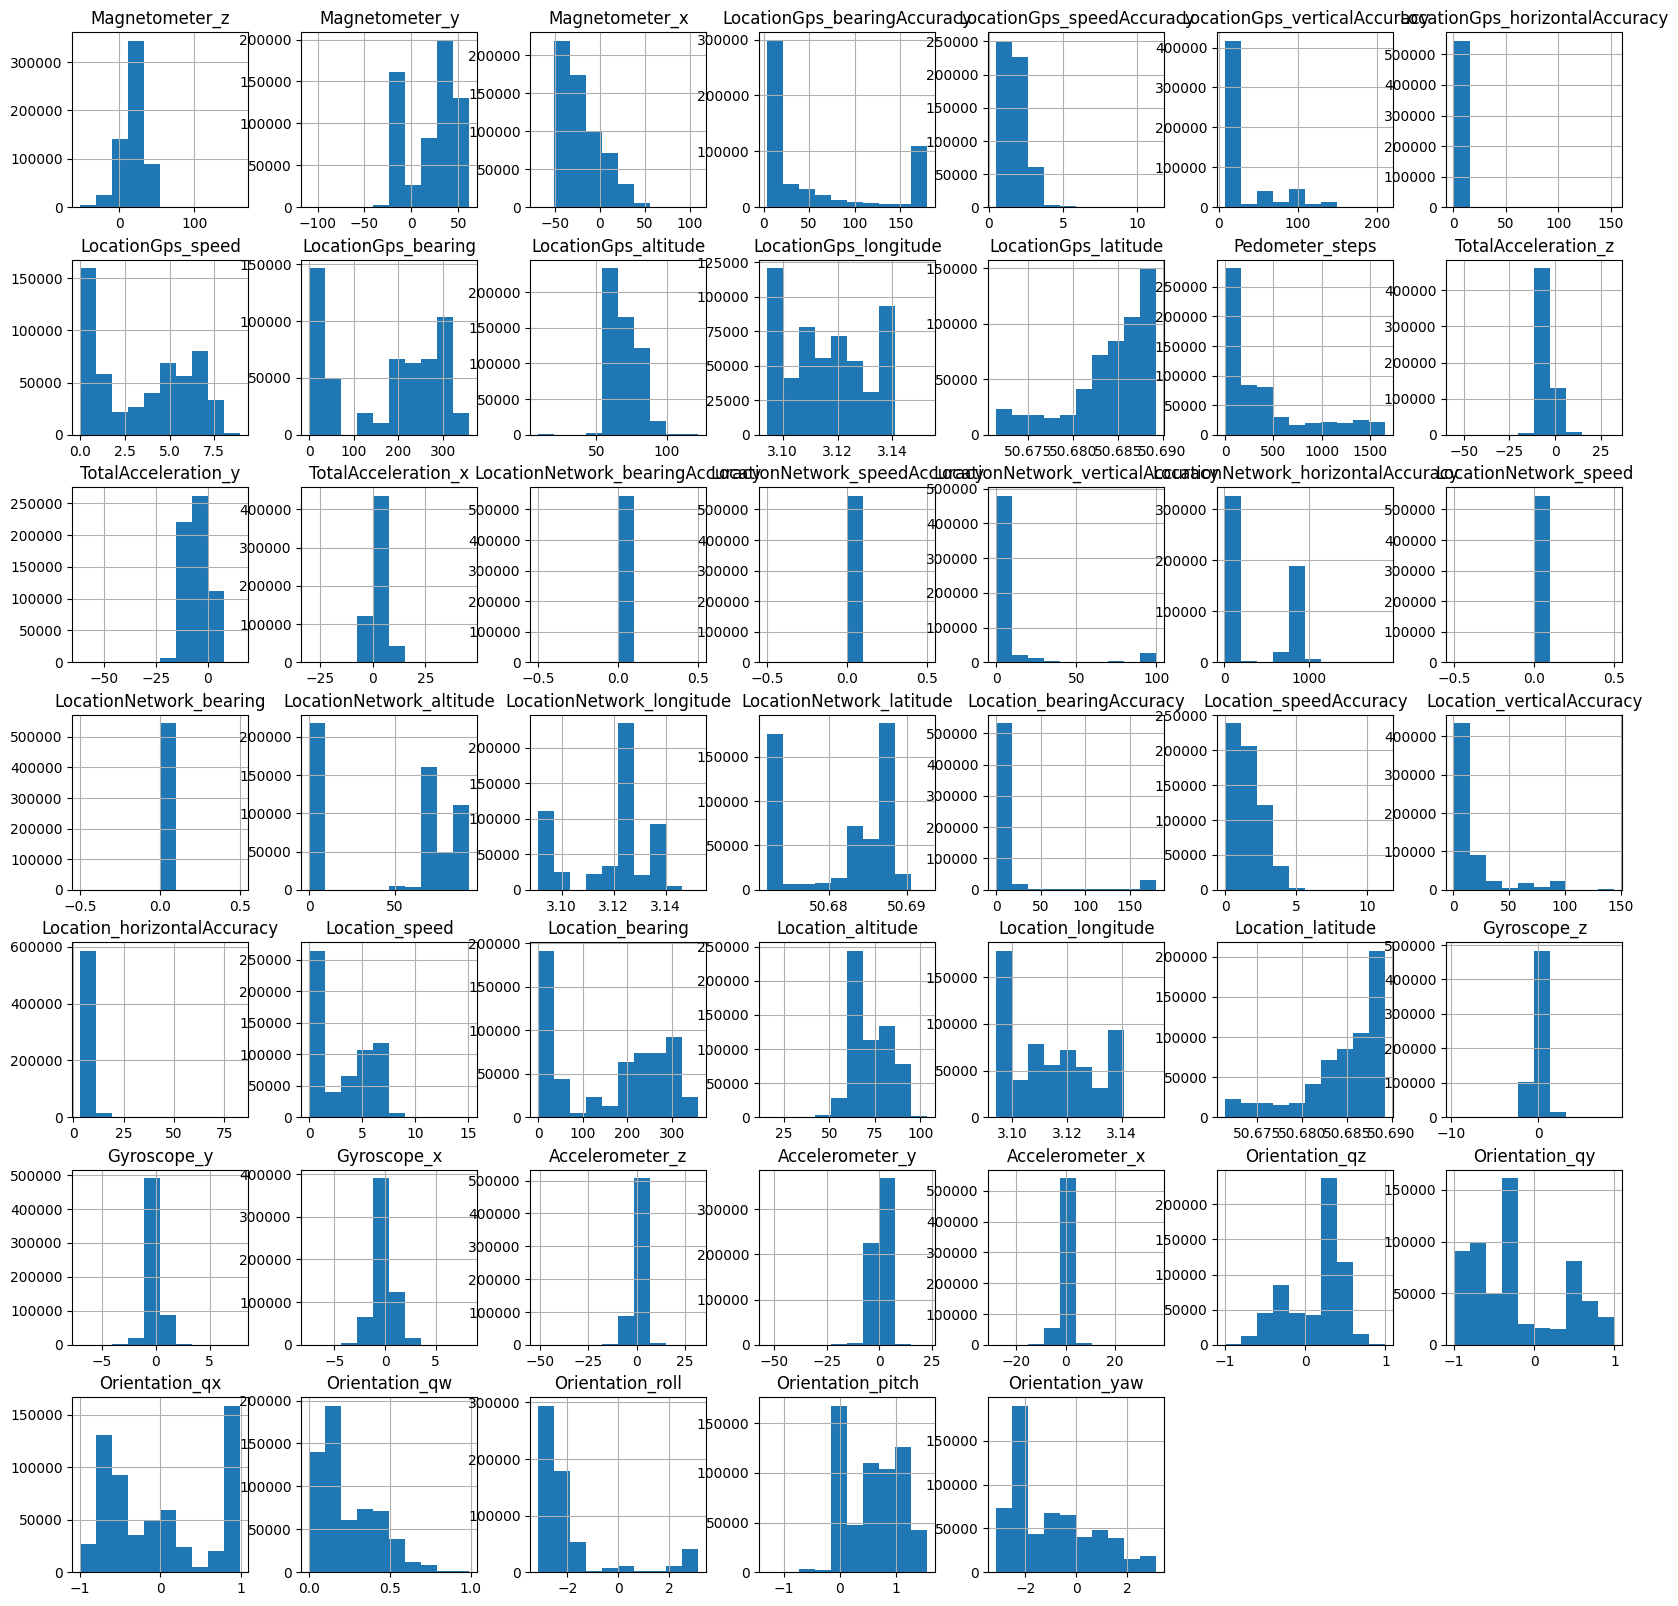

In [14]:
x_train.hist(figsize=(20,20))

columns LocationNetwork_bearingAccuracy, LocationNetwork_speedAccuracy, LocationNetwork_horizontalAccuracy, LocationNetwork_speed, LocationNetwork_bearing, Location_horizontalAccuracy, LocationGps_horizontalAccuracy to check

In [15]:
print(x_train['LocationNetwork_bearingAccuracy'].describe())
print(x_train['LocationNetwork_speedAccuracy'].describe())
print(x_train['LocationNetwork_horizontalAccuracy'].describe())
print(x_train['LocationNetwork_speed'].describe())
print(x_train['LocationNetwork_bearing'].describe())
print(x_train['Location_horizontalAccuracy'].describe())

count    545053.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: LocationNetwork_bearingAccuracy, dtype: float64
count    545053.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: LocationNetwork_speedAccuracy, dtype: float64
count    545053.000000
mean        338.845897
std         370.164491
min          11.505000
25%          17.260000
50%          68.292000
75%         800.000000
max        1899.999023
Name: LocationNetwork_horizontalAccuracy, dtype: float64
count    545053.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: LocationNetwork_speed, dtype: float64
count    545053.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: LocationNetwork_bearing, dt

Almost all columns from above are 0 - delete them

In [8]:
x_train = x_train.drop(columns=['LocationNetwork_bearingAccuracy','LocationNetwork_speedAccuracy','LocationNetwork_speed','LocationNetwork_bearing','Location_horizontalAccuracy'])
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602547 entries, 0 to 602546
Data columns (total 43 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                602547 non-null  object 
 1   Magnetometer_z                      602547 non-null  float64
 2   Magnetometer_y                      602547 non-null  float64
 3   Magnetometer_x                      602547 non-null  float64
 4   LocationGps_bearingAccuracy         545053 non-null  float64
 5   LocationGps_speedAccuracy           545053 non-null  float64
 6   LocationGps_verticalAccuracy        545053 non-null  float64
 7   LocationGps_horizontalAccuracy      545053 non-null  float64
 8   LocationGps_speed                   545053 non-null  float64
 9   LocationGps_bearing                 545053 non-null  float64
 10  LocationGps_altitude                545053 non-null  float64
 11  LocationGps_longitude     

### Correlation heatmap

In [9]:
x_train['time'] = pd.to_datetime(x_train['time'])
x_train['time'] = x_train['time'].apply(lambda x: x.timestamp())

DF ORIGINAL


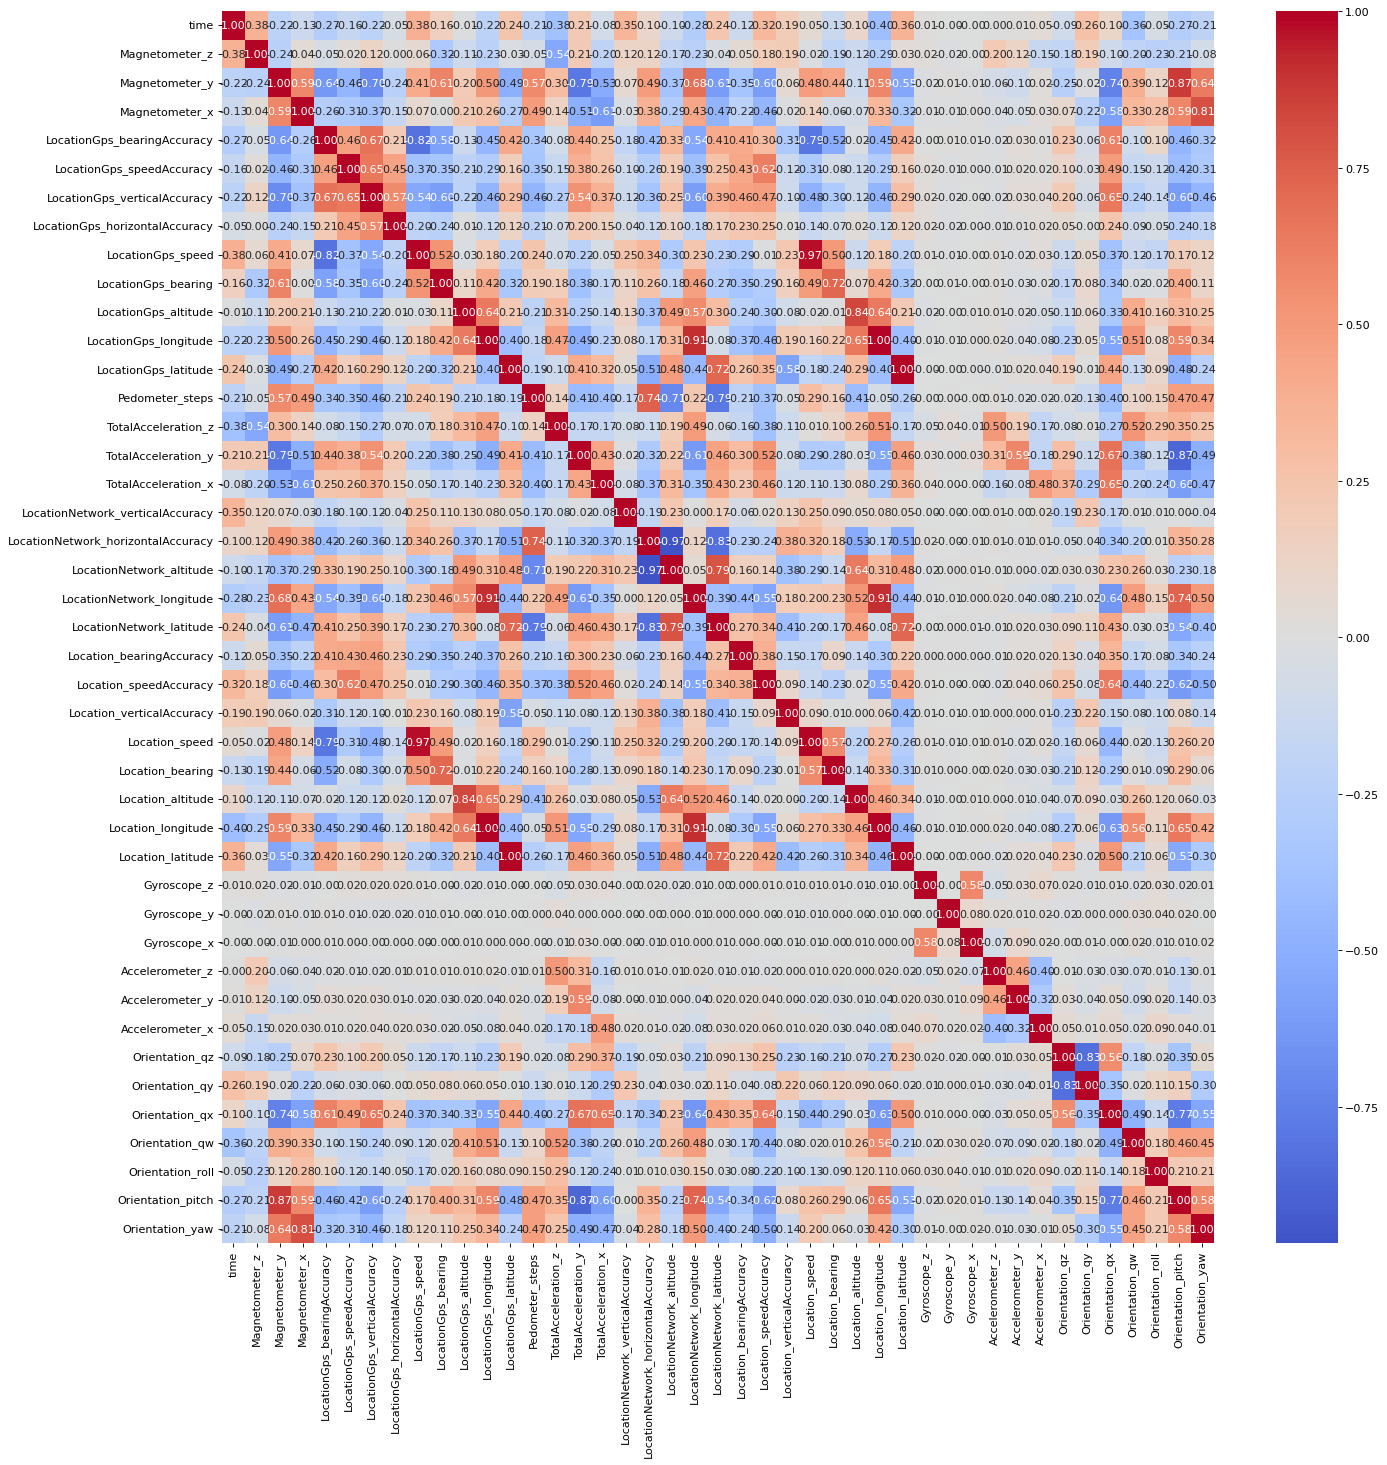

In [18]:
df_original_corr = x_train.loc[:,x_train.columns != 'TYPE'].corr()
print("DF ORIGINAL")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_original_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

In [10]:
df_copy = x_train.copy()
df_copy.dropna(inplace=True)

DF COPY WITH DROPPED ROWS WITH NA VALUES


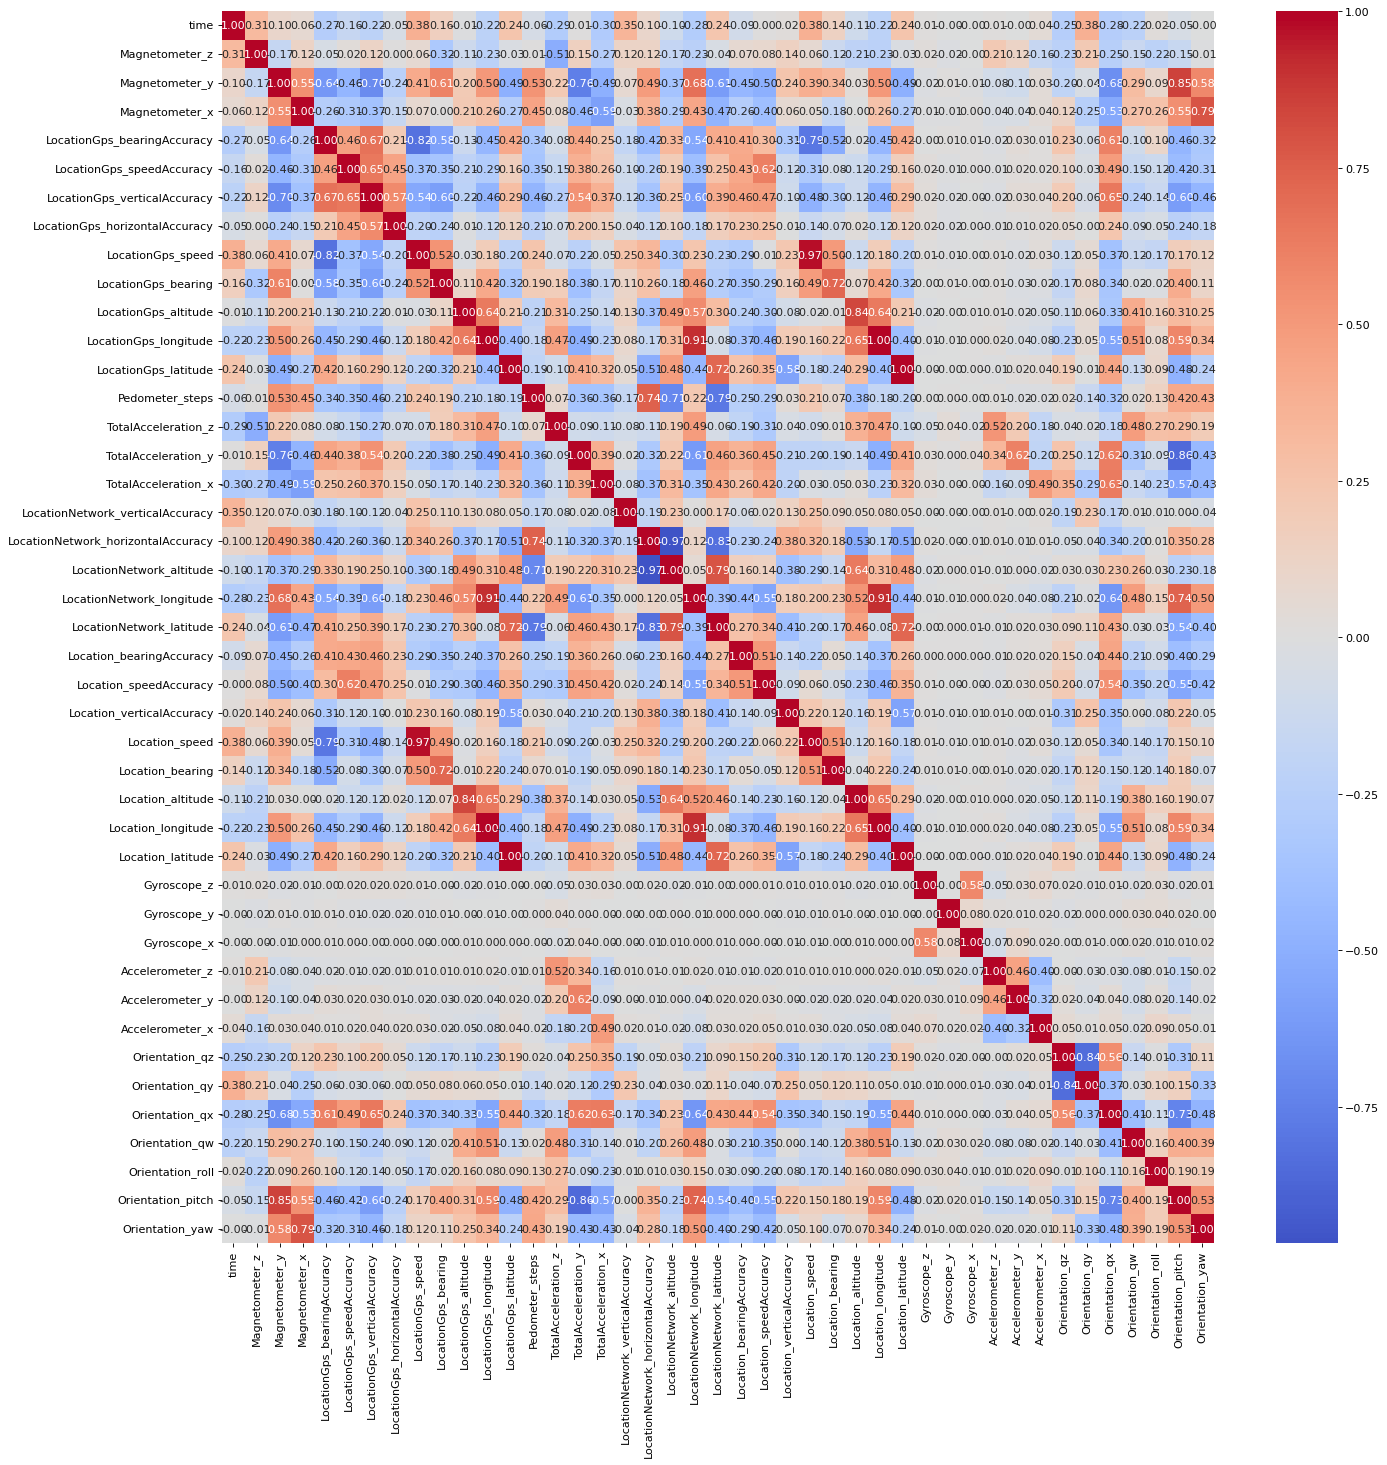

In [20]:
df_copy_corr = df_copy.loc[:,df_copy.columns != 'TYPE'].corr()
print("DF COPY WITH DROPPED ROWS WITH NA VALUES")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_copy_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

In [11]:
df_original_narrow = x_train.copy()
df_original_narrow = df_original_narrow.loc[:, ~df_original_narrow.columns.str.startswith('LocationNetwork')]
df_original_narrow = df_original_narrow.loc[:, ~df_original_narrow.columns.str.startswith('LocationGps')]
df_original_narrow.describe()

time  Magnetometer_z  Magnetometer_y  Magnetometer_x  \
count  6.025470e+05   602547.000000   602547.000000   602547.000000   
mean   1.695344e+09       19.475563       21.506152      -18.766663   
std    1.157843e+06       15.683265       25.688392       21.145895   
min    1.694673e+09      -52.350002     -108.712502      -68.493752   
25%    1.694683e+09        8.887501      -10.162500      -36.412502   
50%    1.694850e+09       24.468752       31.631250      -24.562502   
75%    1.694851e+09       30.281252       43.237503       -4.031250   
max    1.697621e+09      161.943756       61.743752      109.912506   

       Pedometer_steps  TotalAcceleration_z  TotalAcceleration_y  \
count    602547.000000        602547.000000        602547.000000   
mean        381.856287            -5.098345            -5.078182   
std         461.691400             3.217957             4.683438   
min           0.000000           -55.123055           -61.578003   
25%           0.000000            -7.491000            -8.727000   
50%         212.000000            -5.824050            -5.380950   
75%         516.000000            -3.001950            -0.096000   
max        1659.000000            32.163002            15.916051   

       TotalAcceleration_x  Location_bearingAccuracy  Location_speedAccuracy  \
count        602547.000000             602547.000000           602547.000000   
mean              3.318816                 16.670884                1.365092   
std               3.530898                 42.789263                1.245483   
min             -29.967001                  0.000000                0.000000   
25%               0.724950                  0.000000                0.000000   
50%               2.815050                  0.000000                1.400000   
75%               6.135000                  9.600000                2.300000   
max              45.853951                179.899994               11.300000   

       ...  Accelerometer_z  Accelerometer_y  Accelerometer_x  Orientation_qz  \
count  ...    602547.000000    602547.000000    602547.000000   602547.000000   
mean   ...         0.163455        -0.176963        -0.175818        0.138072   
std    ...         2.187609         2.264106         1.768844        0.349103   
min    ...       -50.805279       -53.370388       -27.946367       -0.999268   
25%    ...        -0.439748        -0.721879        -0.544769       -0.146081   
50%    ...         0.063267        -0.002956        -0.055171        0.300582   
75%    ...         0.546806         0.429159         0.384501        0.372601   
max    ...        31.918959        22.798218        36.625866        0.998643   

       Orientation_qy  Orientation_qx  Orientation_qw  Orientation_roll  \
count   602547.000000   602547.000000   602547.000000     602547.000000   
mean        -0.214071       -0.009720        0.243270         -1.985449   
std          0.557607        0.641397        0.177897          1.626183   
min         -0.998568       -0.998610        0.000001         -3.141592   
25%         -0.732906       -0.610530        0.109808         -2.811319   
50%         -0.334230       -0.104151        0.161877         -2.509332   
75%          0.393847        0.861188        0.371903         -1.947252   
max          0.999152        0.998588        0.991917          3.141590   

       Orientation_pitch  Orientation_yaw  
count      602547.000000    602547.000000  
mean            0.601755        -0.951928  
std             0.496454         1.577183  
min            -1.289985        -3.141371  
25%             0.099241        -2.392391  
50%             0.626367        -1.288448  
75%             1.044492         0.108636  
max             1.569883         3.141470  

[8 rows x 29 columns]

In [22]:
null_counts = df_original_narrow.isnull().sum()

print(null_counts)

time                         0
Magnetometer_z               0
Magnetometer_y               0
Magnetometer_x               0
Pedometer_steps              0
TotalAcceleration_z          0
TotalAcceleration_y          0
TotalAcceleration_x          0
Location_bearingAccuracy     0
Location_speedAccuracy       0
Location_verticalAccuracy    0
Location_speed               0
Location_bearing             0
Location_altitude            0
Location_longitude           0
Location_latitude            0
Gyroscope_z                  0
Gyroscope_y                  0
Gyroscope_x                  0
Accelerometer_z              0
Accelerometer_y              0
Accelerometer_x              0
Orientation_qz               0
Orientation_qy               0
Orientation_qx               0
Orientation_qw               0
Orientation_roll             0
Orientation_pitch            0
Orientation_yaw              0
dtype: int64


In [12]:
na_rows = df_original_narrow[df_original_narrow['Orientation_pitch'].isna()]

print(na_rows)

y_train = y_train.drop(index=na_rows.index)


Empty DataFrame
Columns: [time, Magnetometer_z, Magnetometer_y, Magnetometer_x, Pedometer_steps, TotalAcceleration_z, TotalAcceleration_y, TotalAcceleration_x, Location_bearingAccuracy, Location_speedAccuracy, Location_verticalAccuracy, Location_speed, Location_bearing, Location_altitude, Location_longitude, Location_latitude, Gyroscope_z, Gyroscope_y, Gyroscope_x, Accelerometer_z, Accelerometer_y, Accelerometer_x, Orientation_qz, Orientation_qy, Orientation_qx, Orientation_qw, Orientation_roll, Orientation_pitch, Orientation_yaw]
Index: []

[0 rows x 29 columns]


In [13]:
df_original_narrow.dropna(inplace=True)
null_counts = df_original_narrow.isnull().sum()

print(null_counts)

time                         0
Magnetometer_z               0
Magnetometer_y               0
Magnetometer_x               0
Pedometer_steps              0
TotalAcceleration_z          0
TotalAcceleration_y          0
TotalAcceleration_x          0
Location_bearingAccuracy     0
Location_speedAccuracy       0
Location_verticalAccuracy    0
Location_speed               0
Location_bearing             0
Location_altitude            0
Location_longitude           0
Location_latitude            0
Gyroscope_z                  0
Gyroscope_y                  0
Gyroscope_x                  0
Accelerometer_z              0
Accelerometer_y              0
Accelerometer_x              0
Orientation_qz               0
Orientation_qy               0
Orientation_qx               0
Orientation_qw               0
Orientation_roll             0
Orientation_pitch            0
Orientation_yaw              0
dtype: int64


DF ORIGINAL NARROW


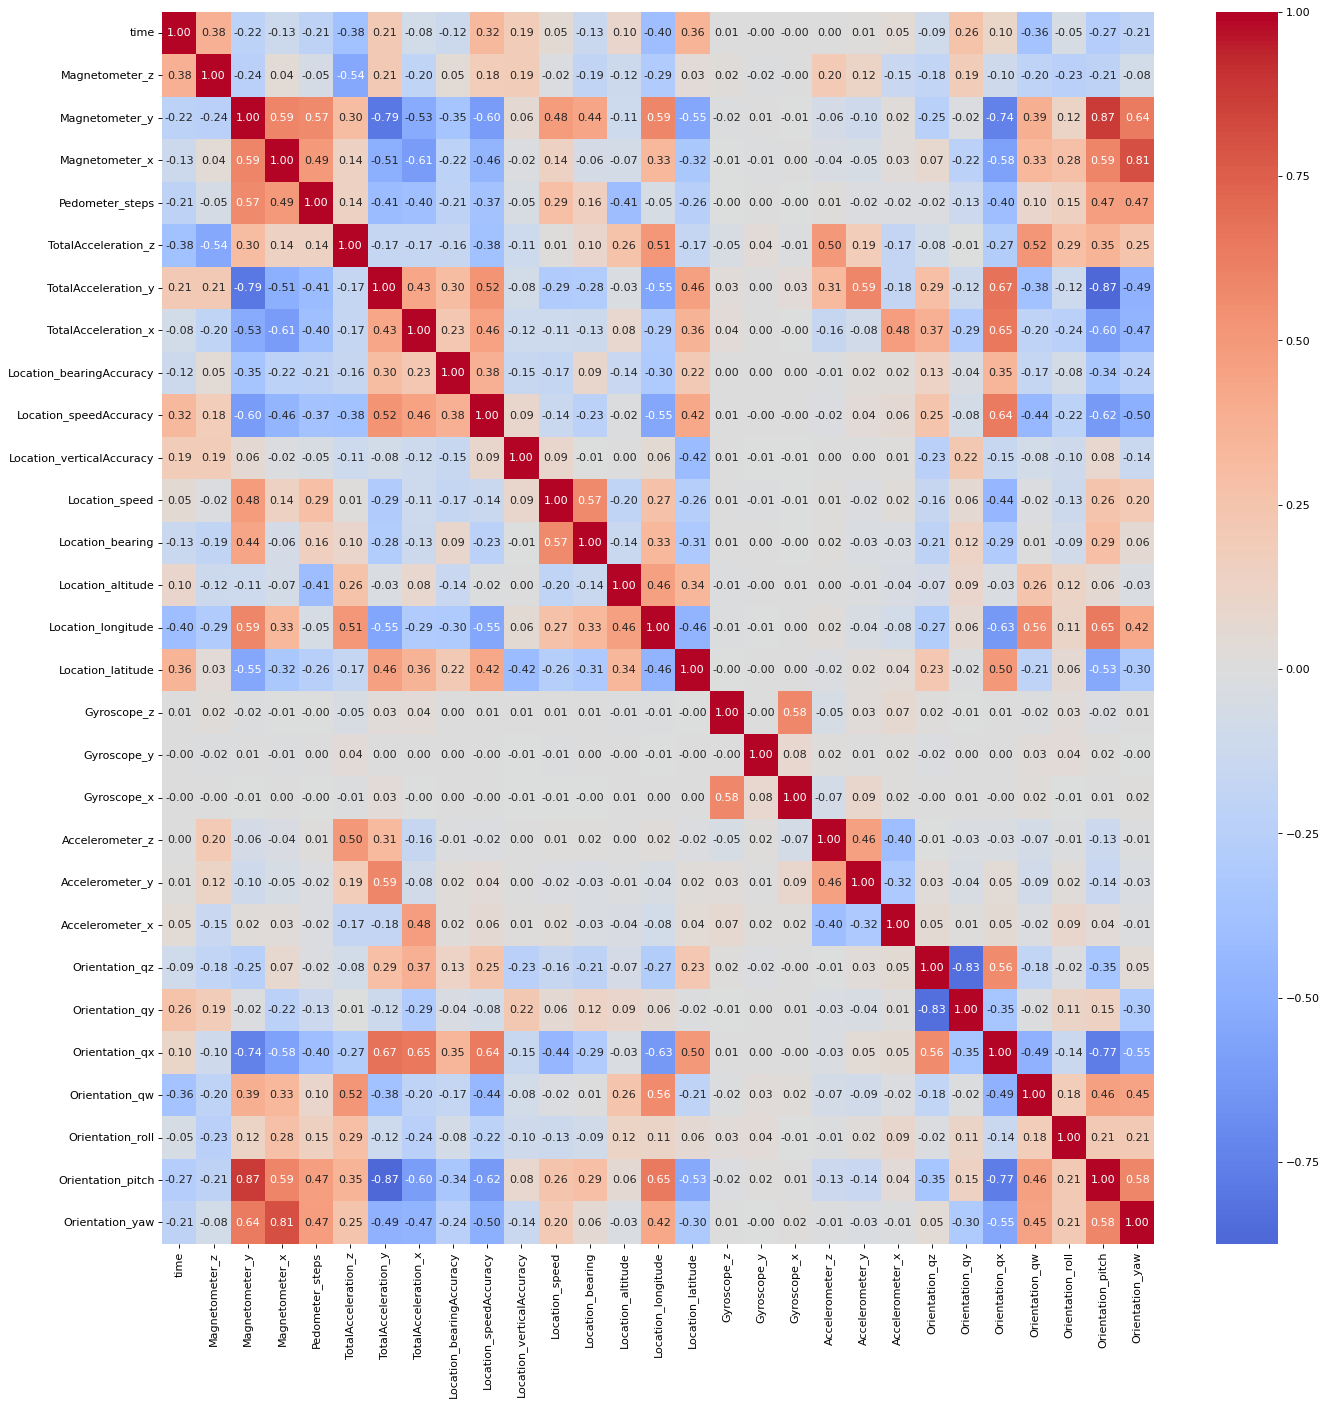

In [25]:
df_original_narrow_corr = df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'].corr()
print("DF ORIGINAL NARROW")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_original_narrow_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

### KMeans clustering

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = model.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
print(labels)

[2 2 1 ... 1 1 2]


In [15]:
print(model.inertia_)

123864284529208.72


In [28]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE    Cycling  Sitting  Walking
labels                           
0        118575   102784    56760
1         66348    57494        0
2        200471        0      115

### Standarization

In [29]:
df_original_narrow.head()

time  Magnetometer_z  Magnetometer_y  Magnetometer_x  \
0  1.694850e+09       22.256250       40.387501      -22.518751   
1  1.694851e+09       37.912502       24.806252      -19.612501   
2  1.694673e+09       27.018751       21.787500        3.356250   
3  1.694729e+09       28.237501       39.487503       -2.943750   
4  1.697620e+09       31.631250      -17.268751      -35.306252   

   Pedometer_steps  TotalAcceleration_z  TotalAcceleration_y  \
0              264             -3.50100            -7.186950   
1              964             -5.68500            -7.000051   
2              147             -6.56895            -4.354050   
3              503             -1.99905           -12.274051   
4                0             -7.87905             0.030000   

   TotalAcceleration_x  Location_bearingAccuracy  Location_speedAccuracy  ...  \
0             -0.03105                       9.1                     1.3  ...   
1              1.27800                       0.0                     0.0  ...   
2              3.15105                       0.0                     0.0  ...   
3              0.50205                       0.0                     0.0  ...   
4              5.75205                       0.0                     3.5  ...   

   Accelerometer_z  Accelerometer_y  Accelerometer_x  Orientation_qz  \
0         0.457695         1.735410        -0.974794       -0.368572   
1         1.252982        -0.156747         0.180731       -0.203575   
2         1.125909         0.606696        -0.363280        0.101127   
3        -2.053128        -2.470761         0.251098        0.033860   
4         0.052949         0.009431        -0.014524        0.298596   

   Orientation_qy  Orientation_qx  Orientation_qw  Orientation_roll  \
0        0.497810       -0.673472        0.403454         -2.910518   
1        0.363383       -0.849604        0.323548         -2.986338   
2       -0.757338       -0.564513        0.312310         -2.712544   
3       -0.053270       -0.704380        0.707011         -1.497754   
4       -0.242010        0.919728        0.079823         -2.513143   

   Orientation_pitch  Orientation_yaw  
0           1.144221        -2.017715  
1           0.772220        -2.396486  
2           0.530287         1.162904  
3           1.543099         1.374443  
4          -0.002305        -2.626244  

[5 rows x 29 columns]

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = pipeline.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])

In [31]:
kmeans.inertia_

12594492.531811282

In [32]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE    Cycling  Sitting  Walking
labels                           
0        105783       38    54892
1          2998   160114       43
2        276613      126     1940

In [33]:
df_original_narrow.head()

time  Magnetometer_z  Magnetometer_y  Magnetometer_x  \
0  1.694850e+09       22.256250       40.387501      -22.518751   
1  1.694851e+09       37.912502       24.806252      -19.612501   
2  1.694673e+09       27.018751       21.787500        3.356250   
3  1.694729e+09       28.237501       39.487503       -2.943750   
4  1.697620e+09       31.631250      -17.268751      -35.306252   

   Pedometer_steps  TotalAcceleration_z  TotalAcceleration_y  \
0              264             -3.50100            -7.186950   
1              964             -5.68500            -7.000051   
2              147             -6.56895            -4.354050   
3              503             -1.99905           -12.274051   
4                0             -7.87905             0.030000   

   TotalAcceleration_x  Location_bearingAccuracy  Location_speedAccuracy  ...  \
0             -0.03105                       9.1                     1.3  ...   
1              1.27800                       0.0                     0.0  ...   
2              3.15105                       0.0                     0.0  ...   
3              0.50205                       0.0                     0.0  ...   
4              5.75205                       0.0                     3.5  ...   

   Accelerometer_z  Accelerometer_y  Accelerometer_x  Orientation_qz  \
0         0.457695         1.735410        -0.974794       -0.368572   
1         1.252982        -0.156747         0.180731       -0.203575   
2         1.125909         0.606696        -0.363280        0.101127   
3        -2.053128        -2.470761         0.251098        0.033860   
4         0.052949         0.009431        -0.014524        0.298596   

   Orientation_qy  Orientation_qx  Orientation_qw  Orientation_roll  \
0        0.497810       -0.673472        0.403454         -2.910518   
1        0.363383       -0.849604        0.323548         -2.986338   
2       -0.757338       -0.564513        0.312310         -2.712544   
3       -0.053270       -0.704380        0.707011         -1.497754   
4       -0.242010        0.919728        0.079823         -2.513143   

   Orientation_pitch  Orientation_yaw  
0           1.144221        -2.017715  
1           0.772220        -2.396486  
2           0.530287         1.162904  
3           1.543099         1.374443  
4          -0.002305        -2.626244  

[5 rows x 29 columns]

### Normalization

In [34]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = pipeline.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
print(labels)


[2 1 0 ... 0 0 2]


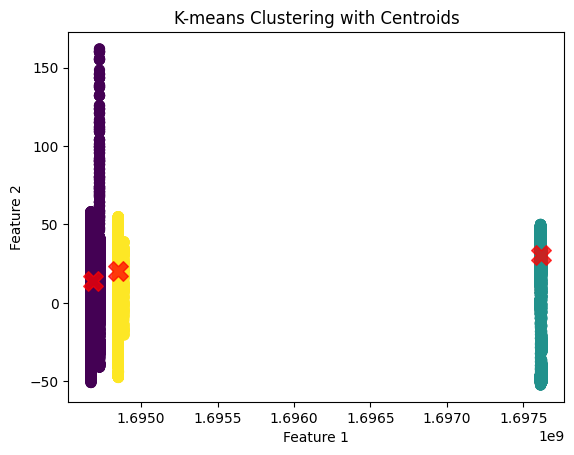

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Przygotowanie danych
X = df_original_narrow.loc[:, df_original_narrow.columns != 'TYPE']

# Zakładając, że 'labels' zawiera przewidywane etykiety klastrów
y_kmeans = y_train['TYPE']


# Zastosowanie algorytmu k-means do ponownego dopasowania modelu (zakładając, że masz 4 klastry)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# Rysowanie wykresu
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')

# Zaznaczenie centroidów
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Dodanie etykiet i tytułu
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with Centroids')
plt.show()

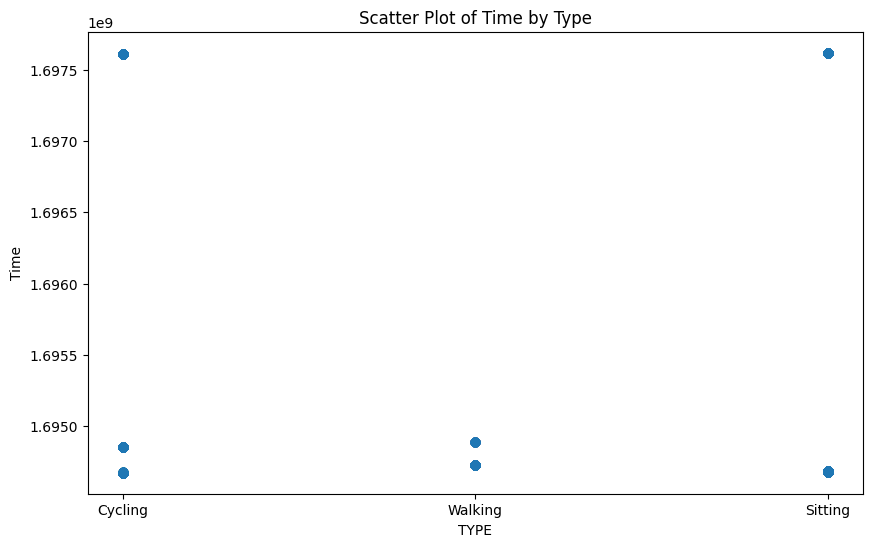

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Zakładamy, że df_original_narrow i y_train są już zdefiniowane
# Upewniamy się, że indeksy obu DataFrame są zgodne
df_original_narrow = df_original_narrow.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Łączenie danych
df_combined = pd.concat([df_original_narrow, y_train[['TYPE']]], axis=1)

# Sprawdzenie połączonych danych

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['TYPE'], df_combined['time'], alpha=0.5)
plt.xlabel('TYPE')
plt.ylabel('Time')
plt.title('Scatter Plot of Time by Type')
plt.show()

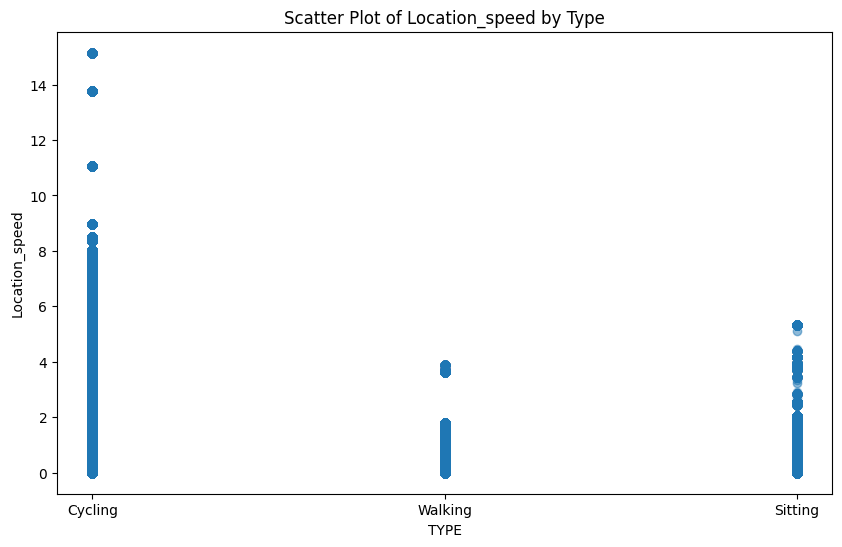

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Zakładamy, że df_original_narrow i y_train są już zdefiniowane
# Upewniamy się, że indeksy obu DataFrame są zgodne
df_original_narrow = df_original_narrow.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Łączenie danych
df_combined = pd.concat([df_original_narrow, y_train[['TYPE']]], axis=1)

# Sprawdzenie połączonych danych

# Tworzenie wykresu punktowego
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['TYPE'], df_combined['Location_speed'], alpha=0.5)
plt.xlabel('TYPE')
plt.ylabel('Location_speed')
plt.title('Scatter Plot of Location_speed by Type')
plt.show()

In [38]:
df_original_narrow.columns


Index(['time', 'Magnetometer_z', 'Magnetometer_y', 'Magnetometer_x',
       'Pedometer_steps', 'TotalAcceleration_z', 'TotalAcceleration_y',
       'TotalAcceleration_x', 'Location_bearingAccuracy',
       'Location_speedAccuracy', 'Location_verticalAccuracy', 'Location_speed',
       'Location_bearing', 'Location_altitude', 'Location_longitude',
       'Location_latitude', 'Gyroscope_z', 'Gyroscope_y', 'Gyroscope_x',
       'Accelerometer_z', 'Accelerometer_y', 'Accelerometer_x',
       'Orientation_qz', 'Orientation_qy', 'Orientation_qx', 'Orientation_qw',
       'Orientation_roll', 'Orientation_pitch', 'Orientation_yaw'],
      dtype='object')

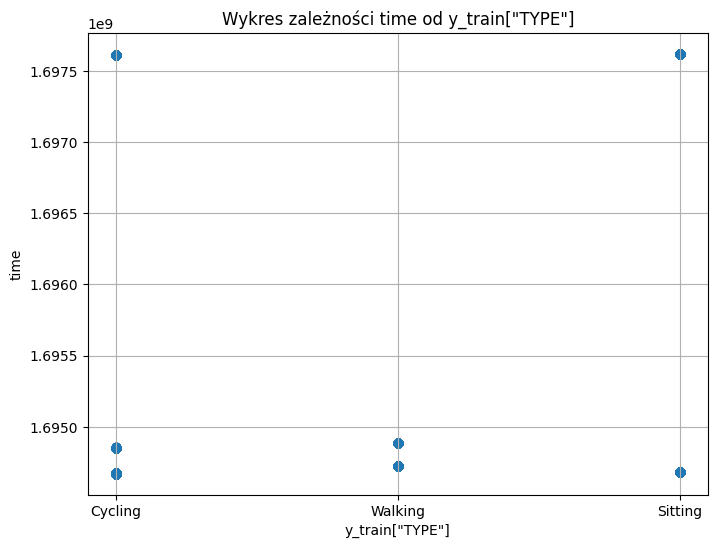

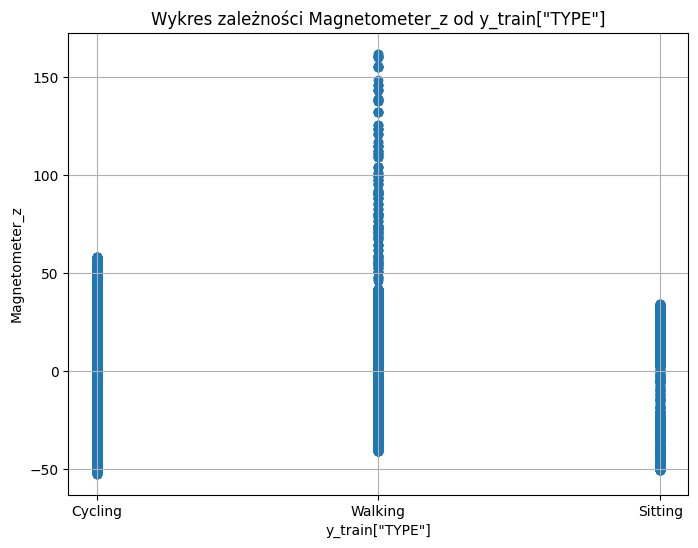

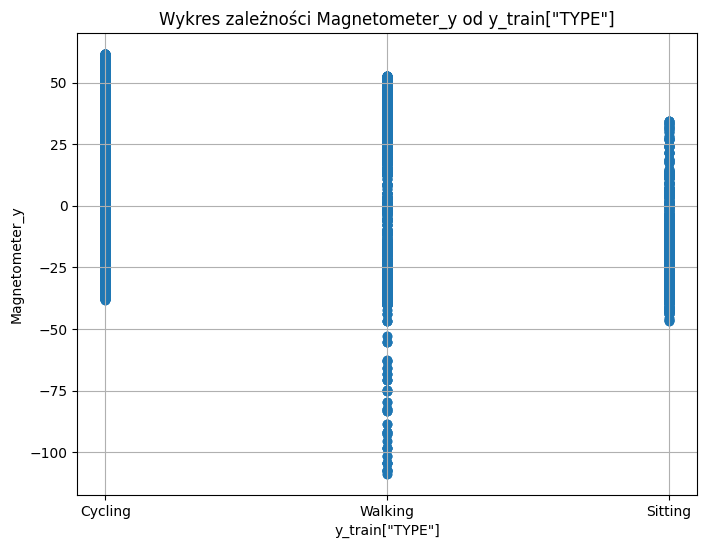

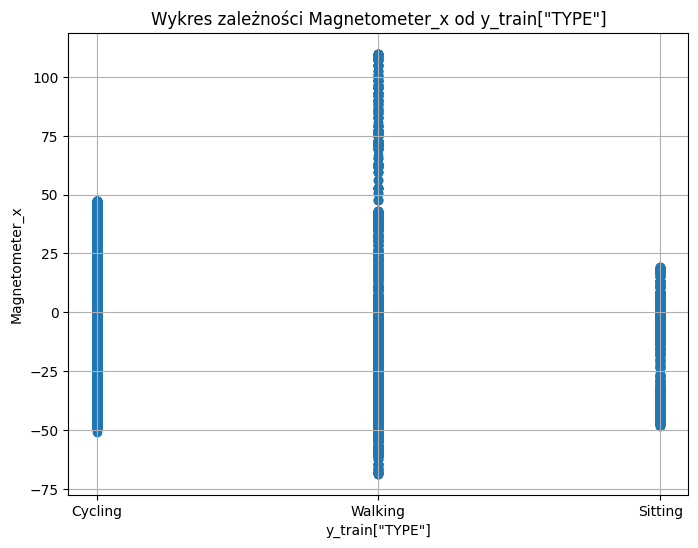

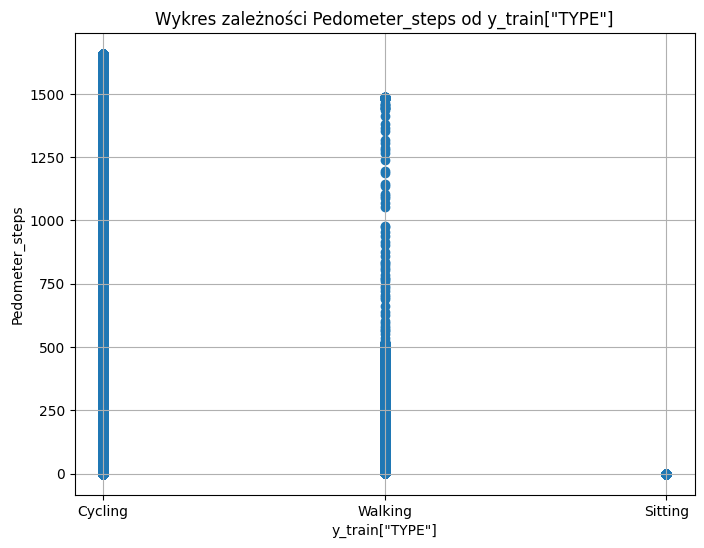

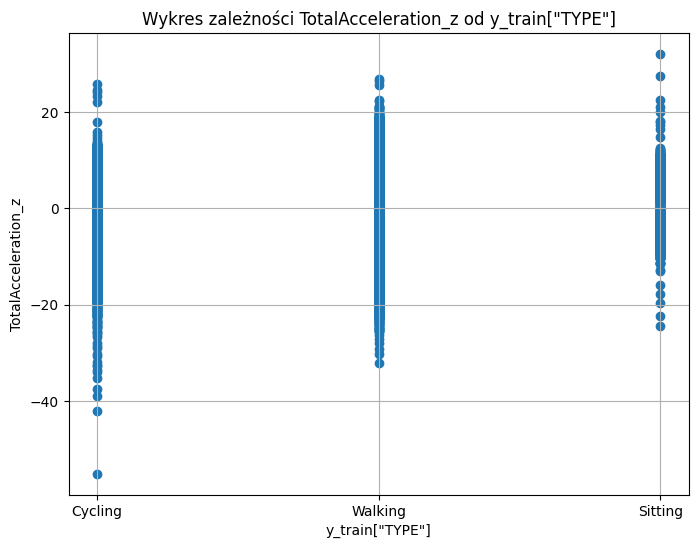

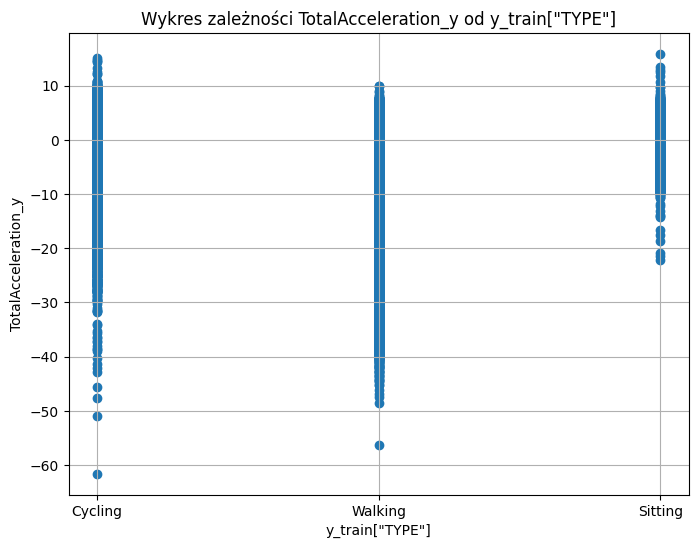

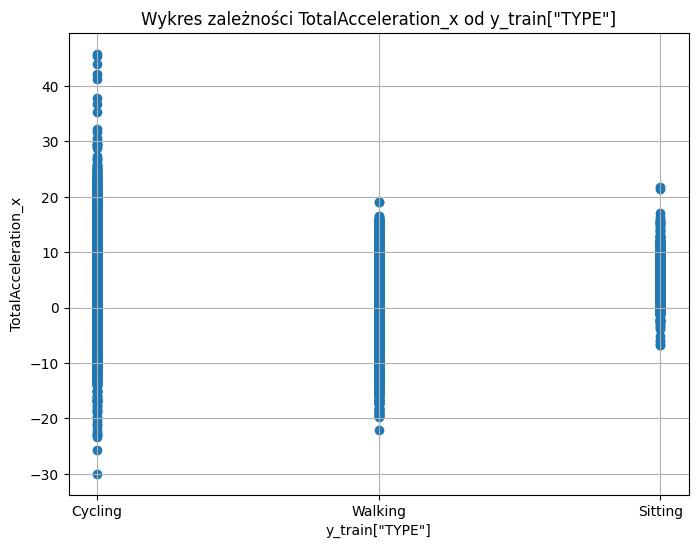

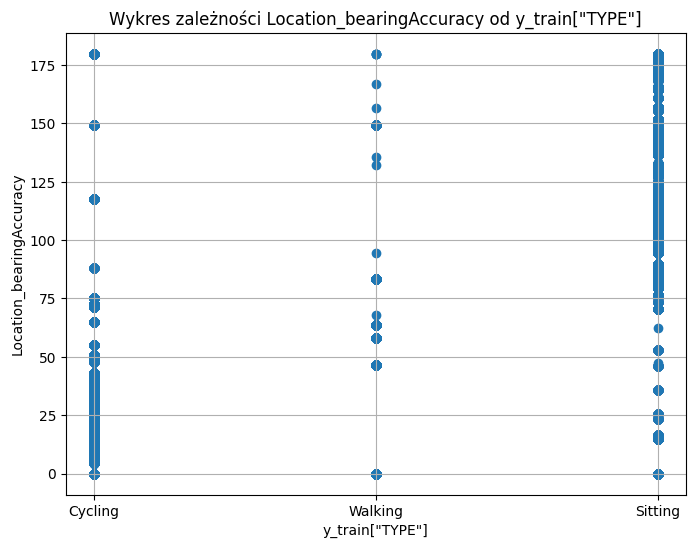

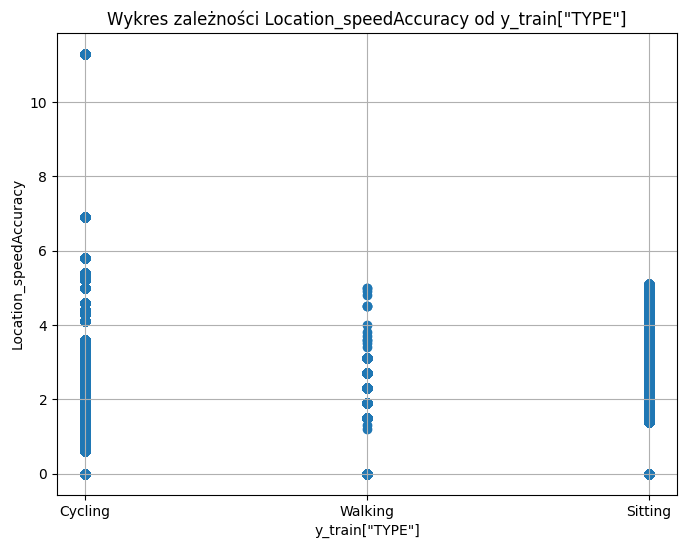

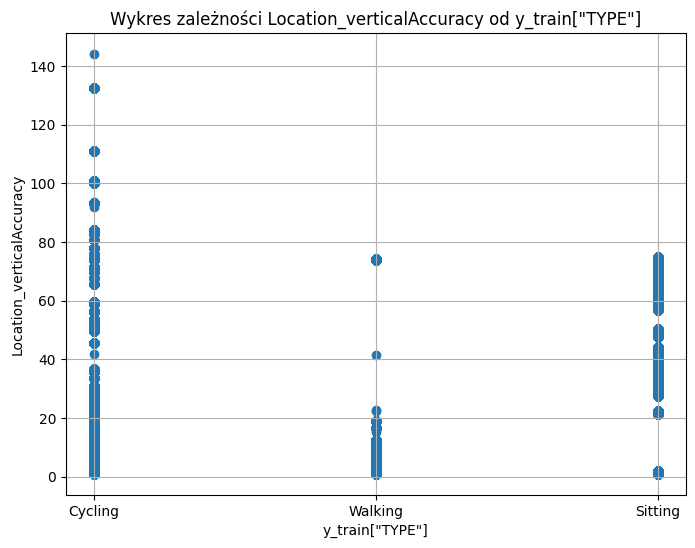

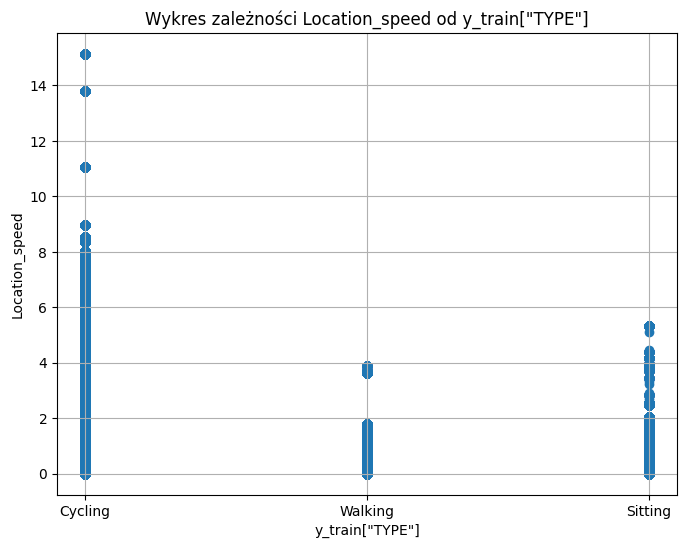

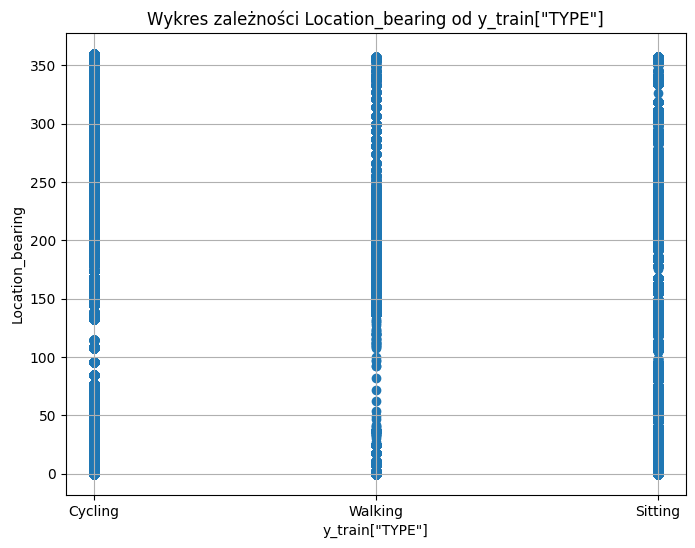

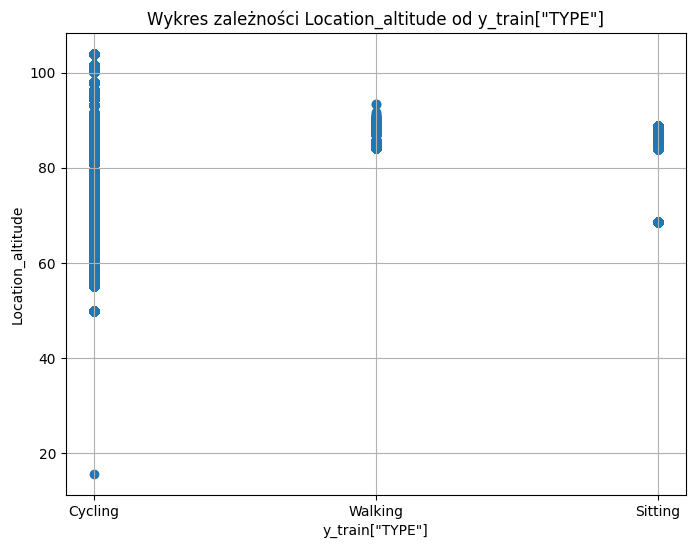

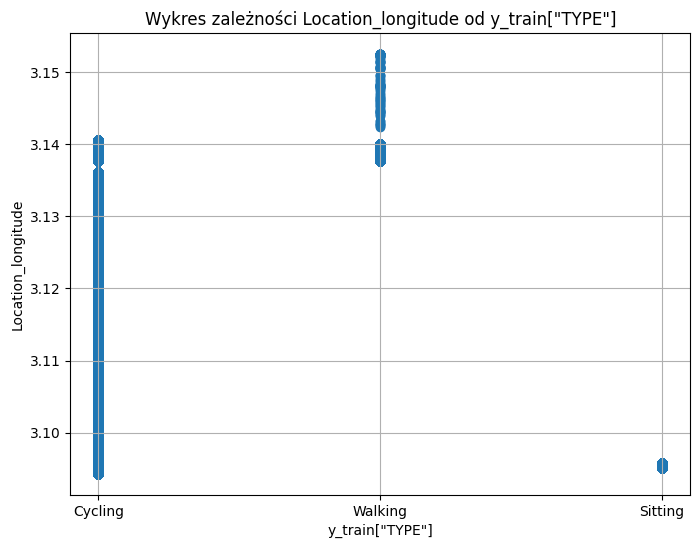

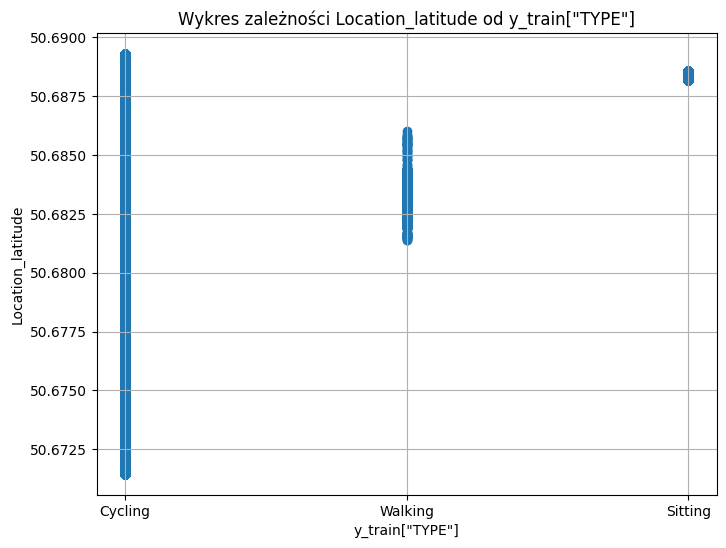

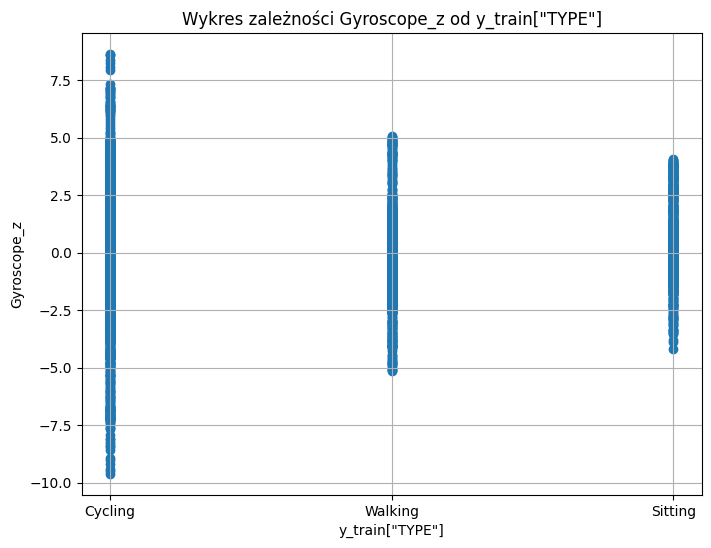

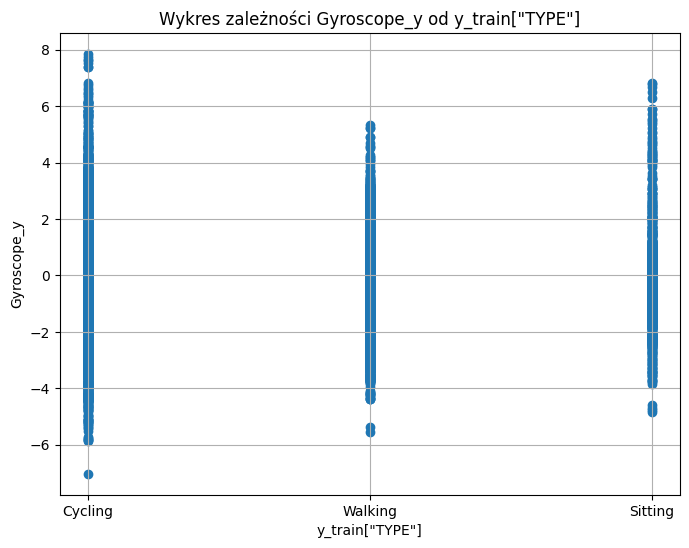

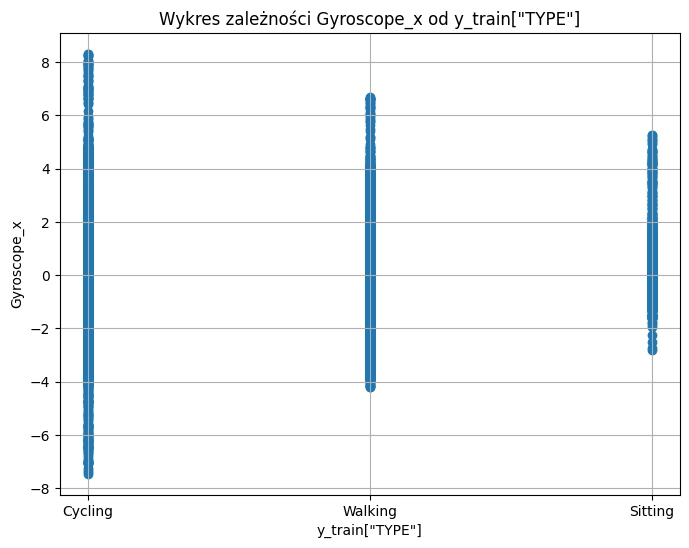

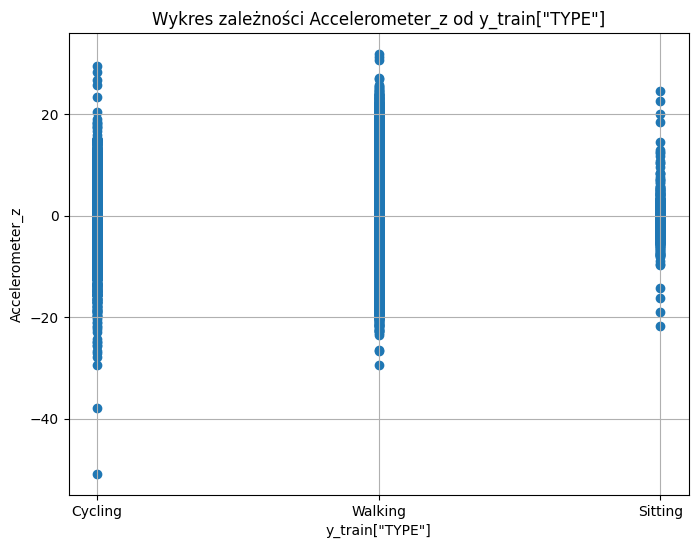

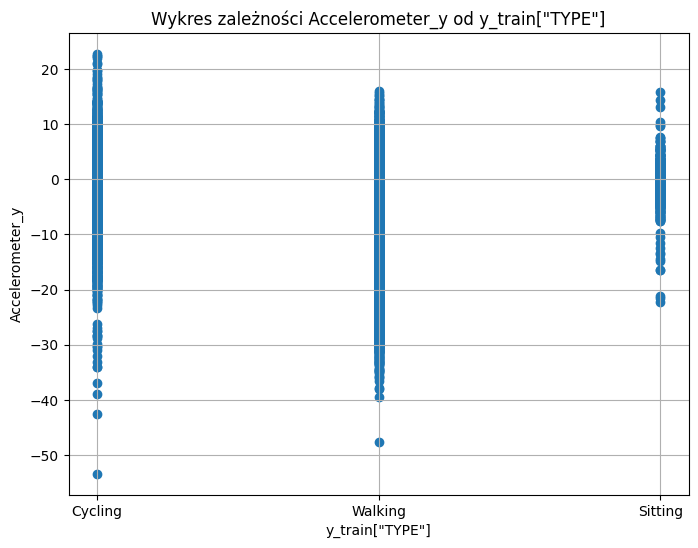

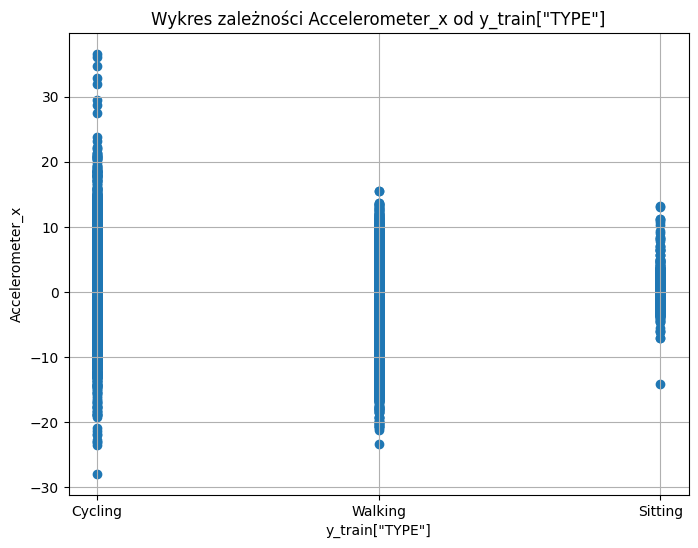

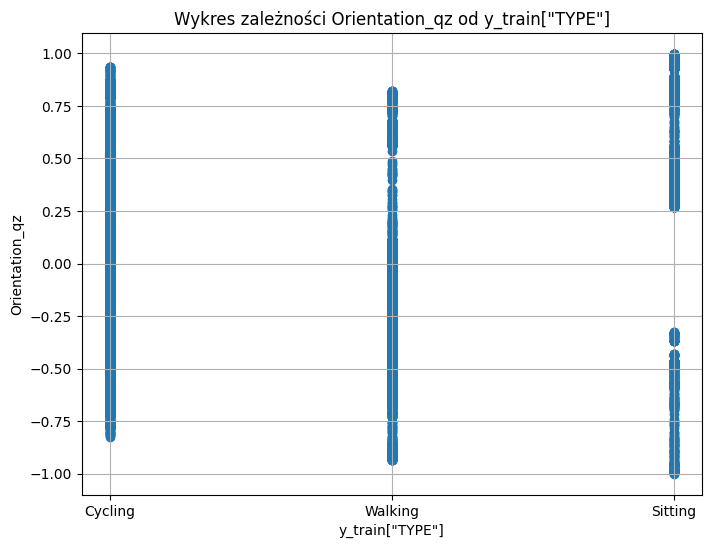

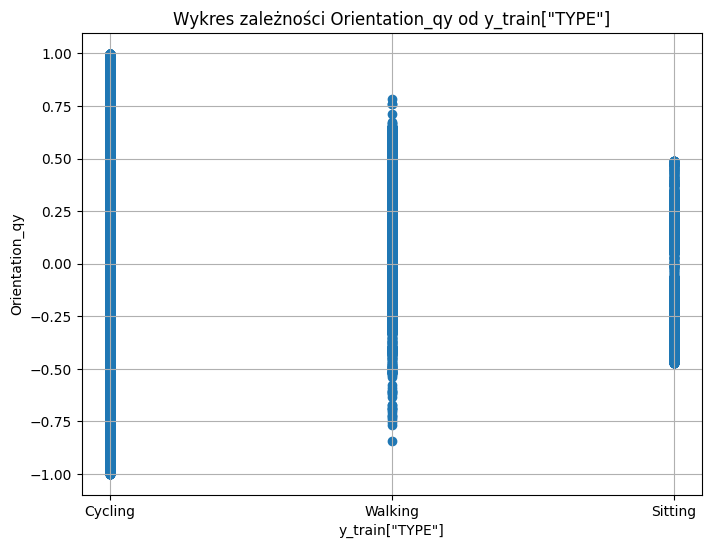

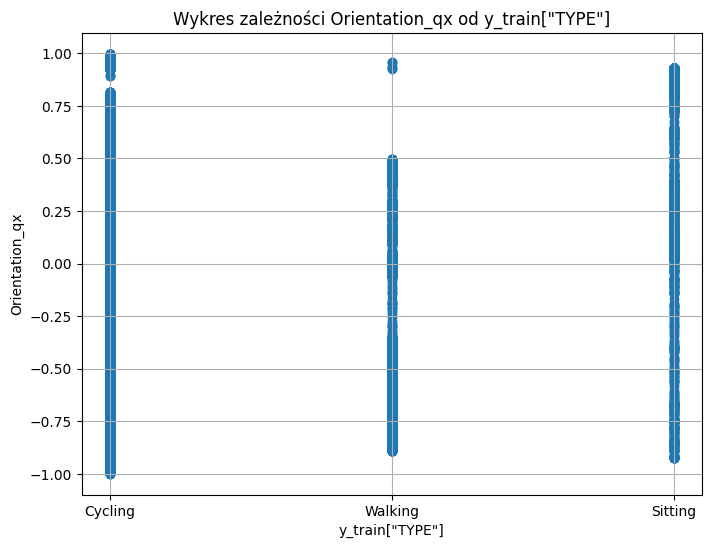

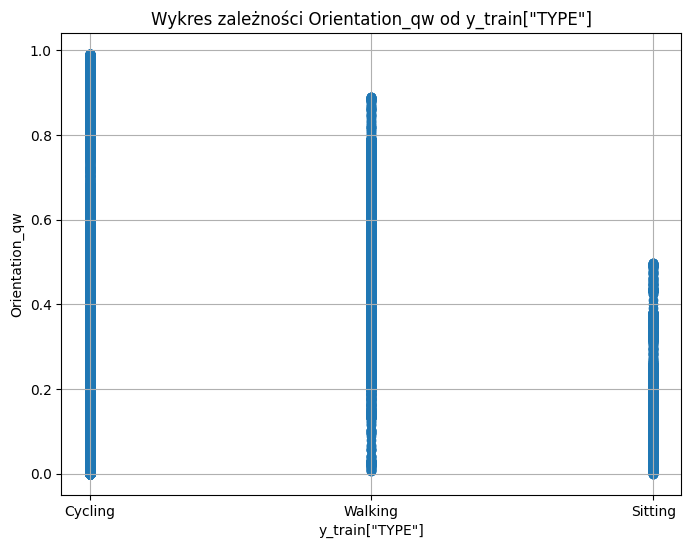

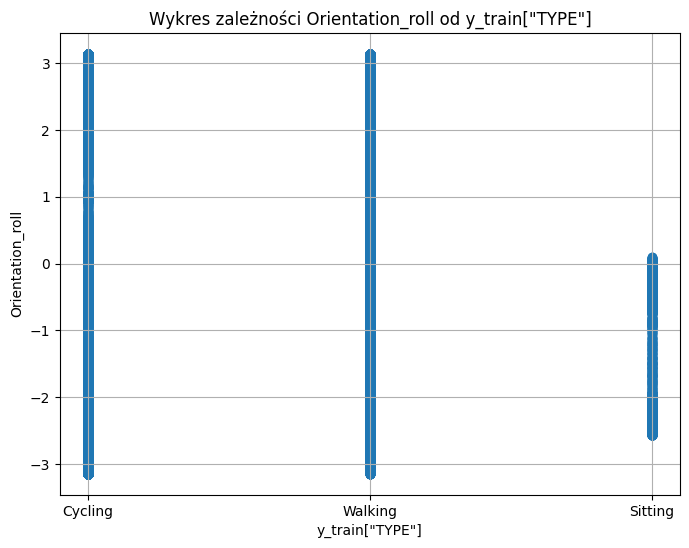

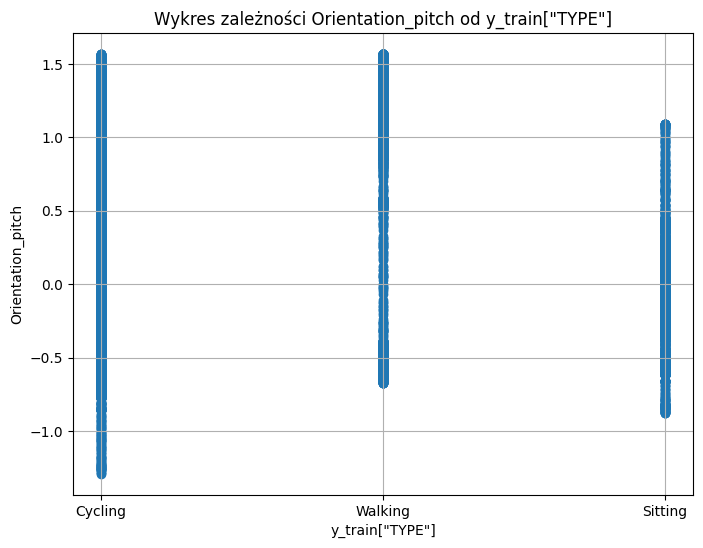

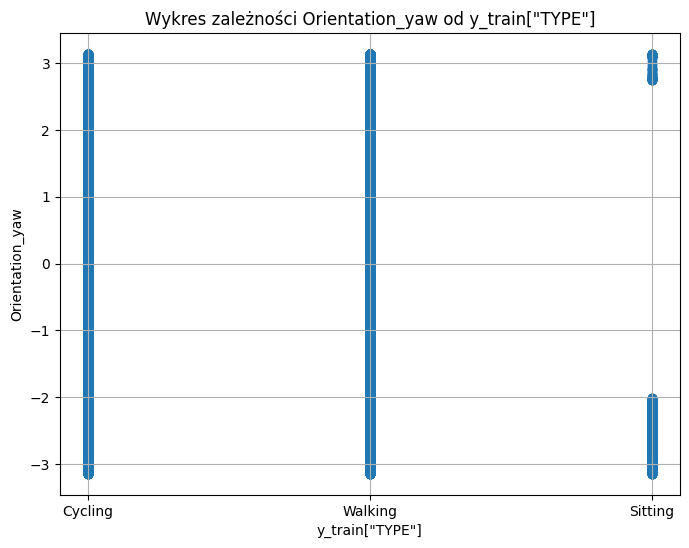

In [39]:
import matplotlib.pyplot as plt

# Przyjmując, że df_original_narrow jest ramką danych, a y_train['TYPE'] to seria
for column in df_original_narrow.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train['TYPE'], df_original_narrow[column])
    plt.title(f'Wykres zależności {column} od y_train["TYPE"]')
    plt.xlabel('y_train["TYPE"]')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

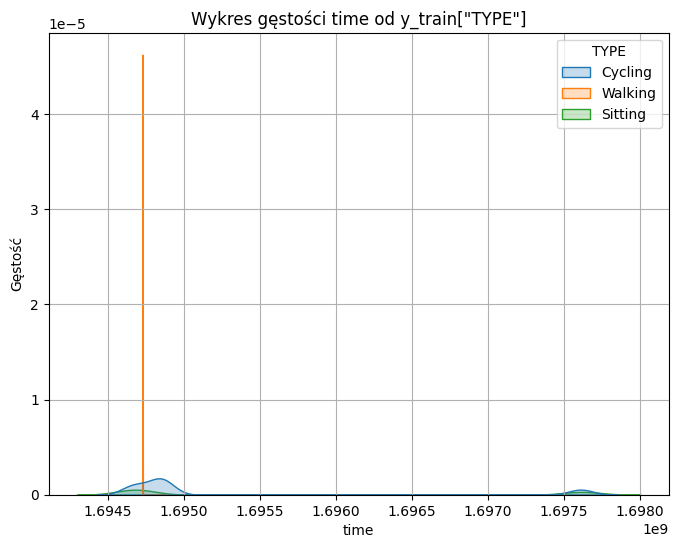

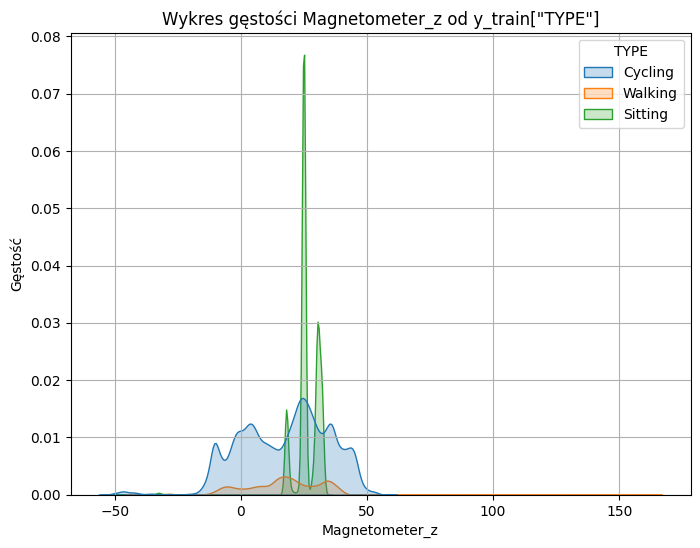

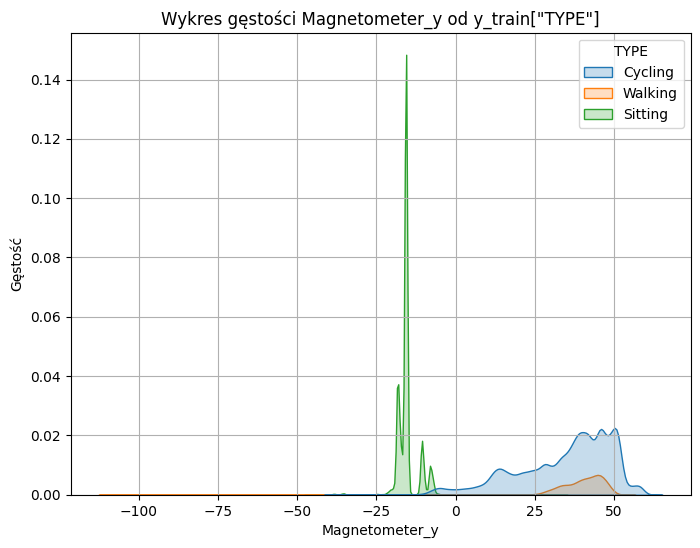

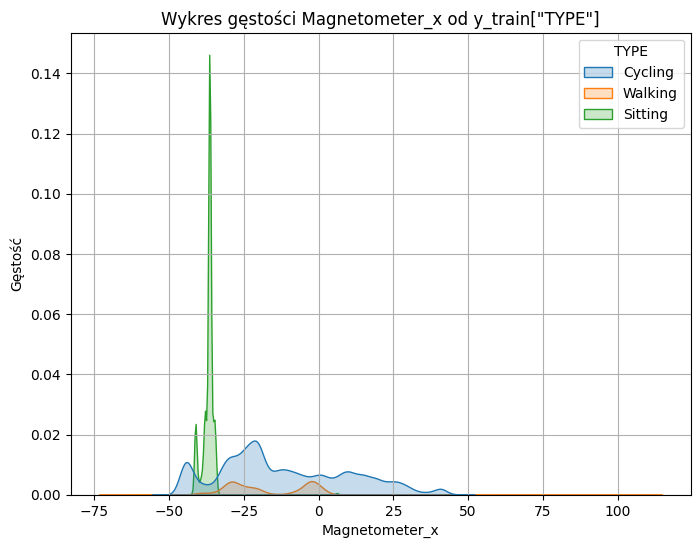

/tmp/ipykernel_3600709/1221312853.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_original_narrow, x=column, hue=y_train['TYPE'], fill=True)


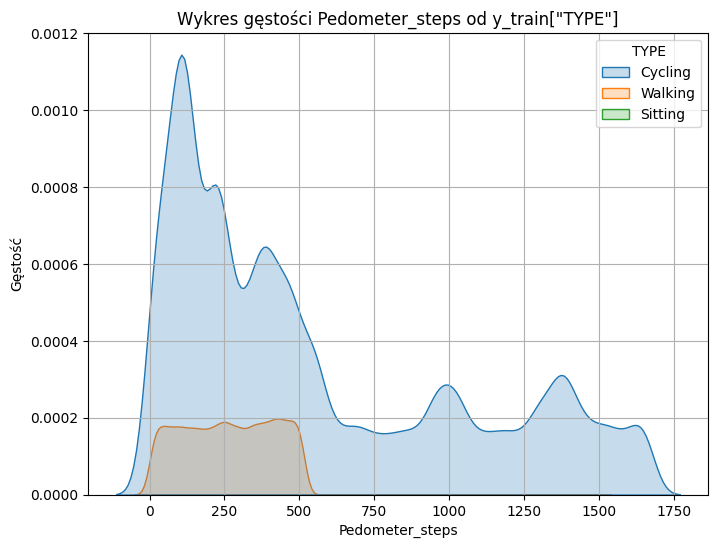

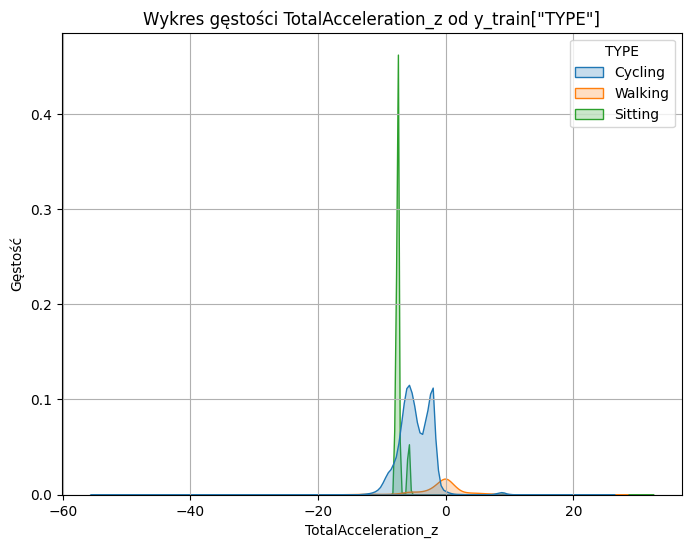

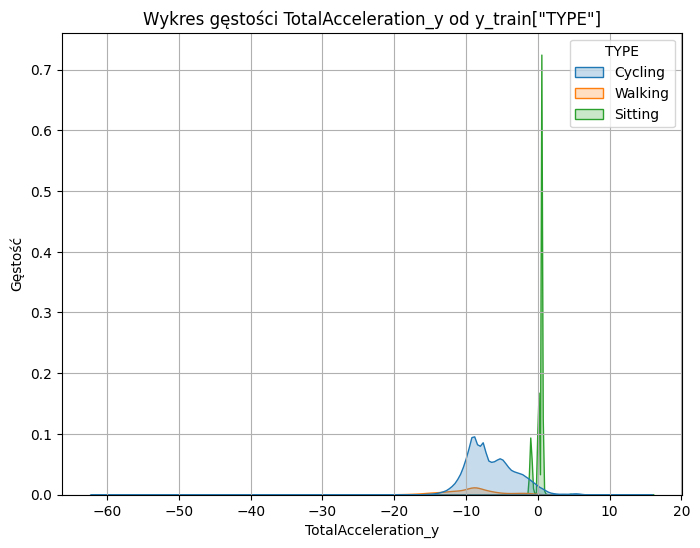

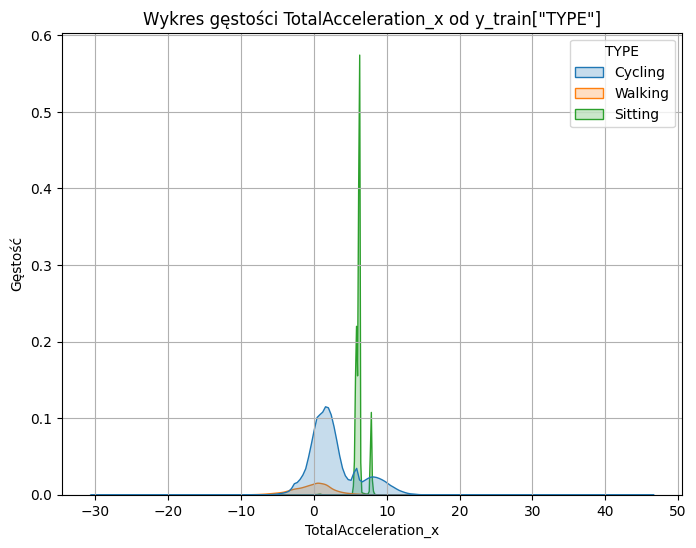

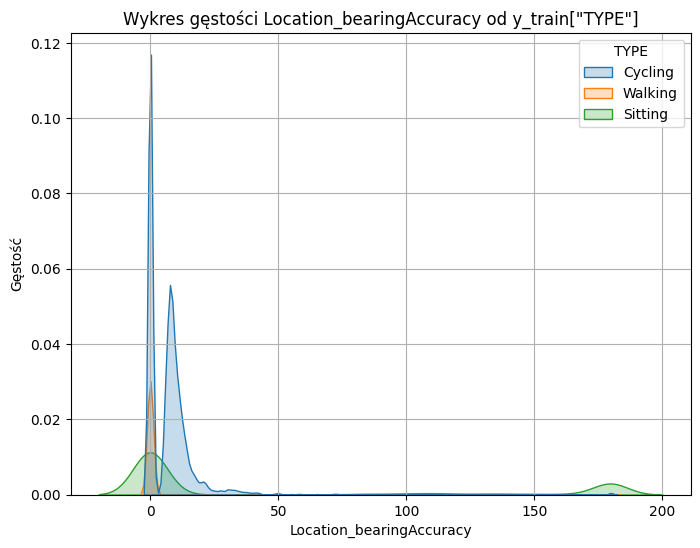

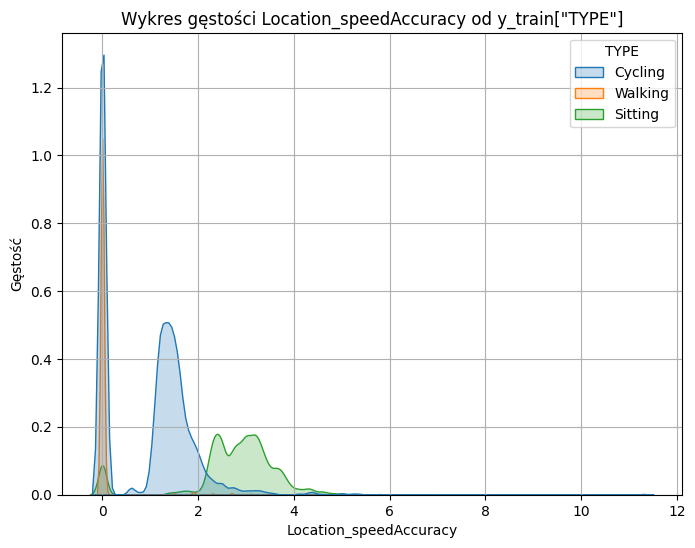

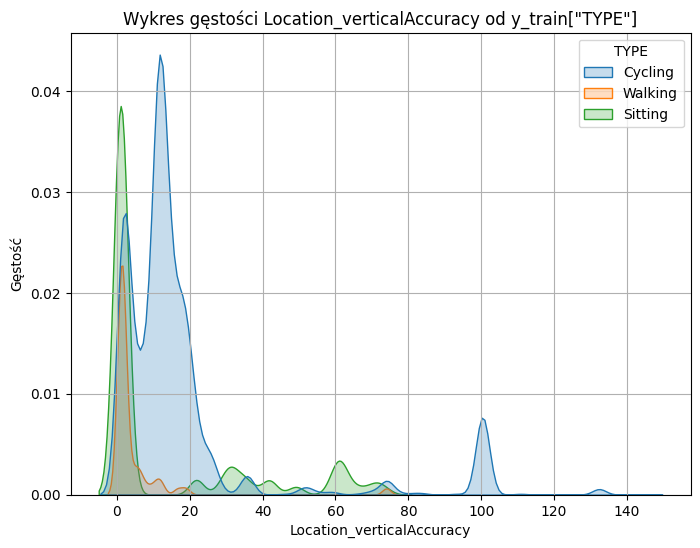

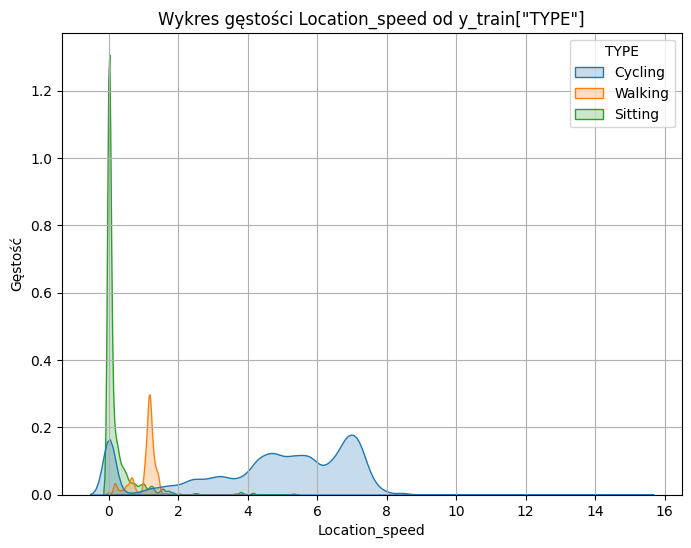

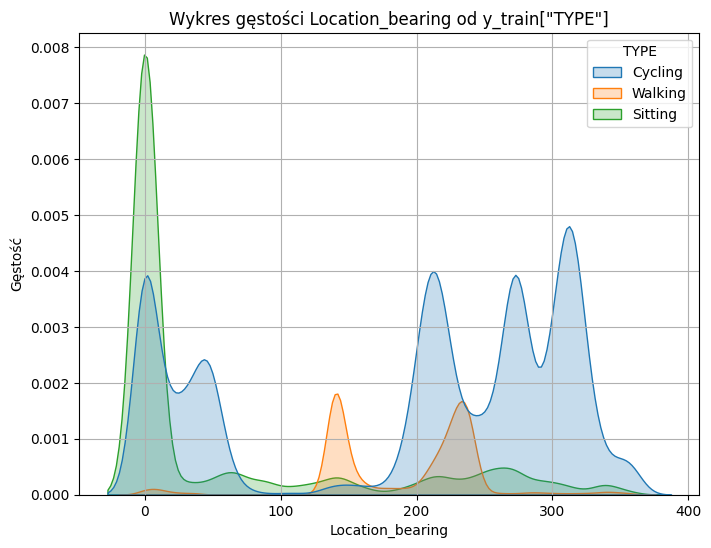

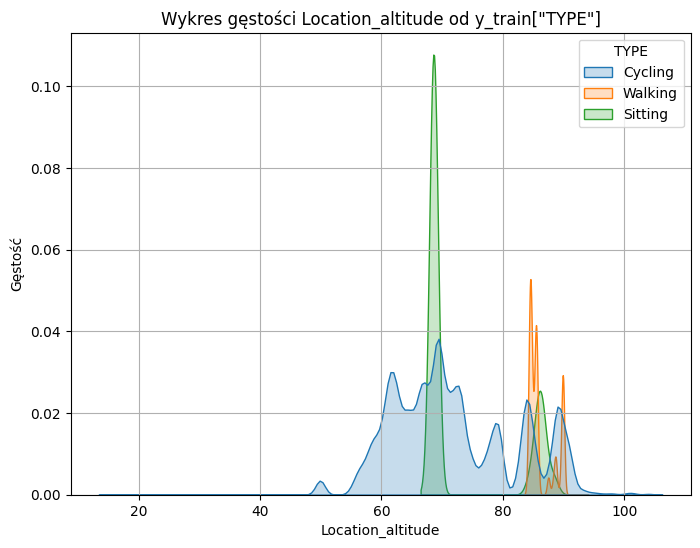

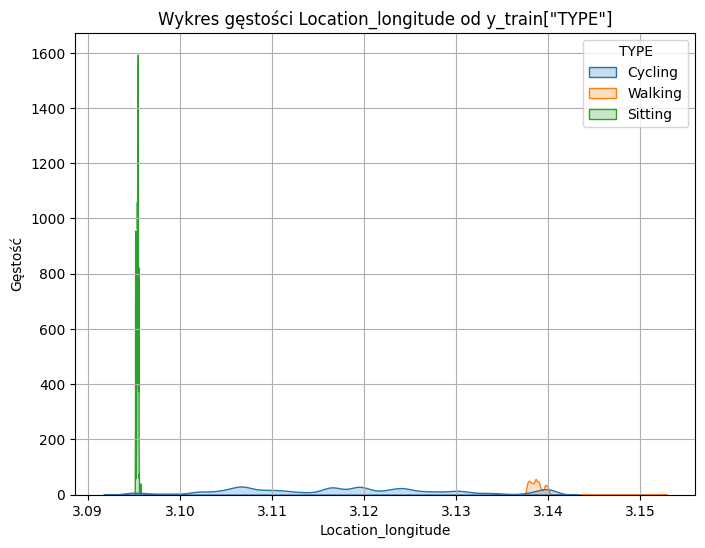

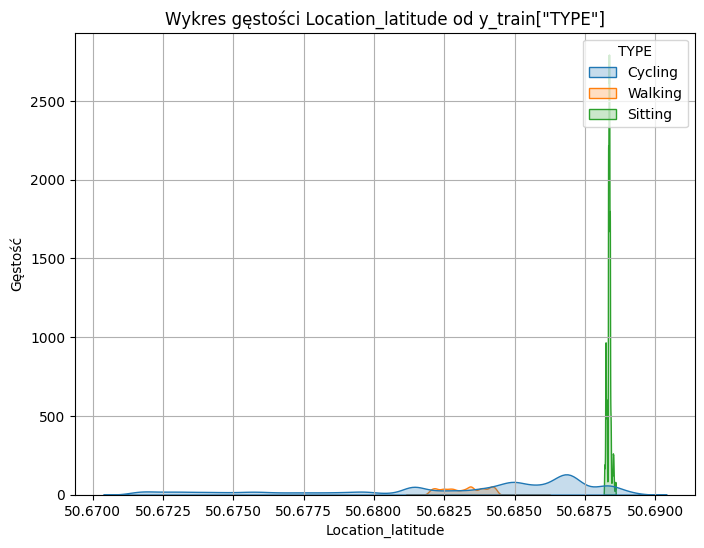

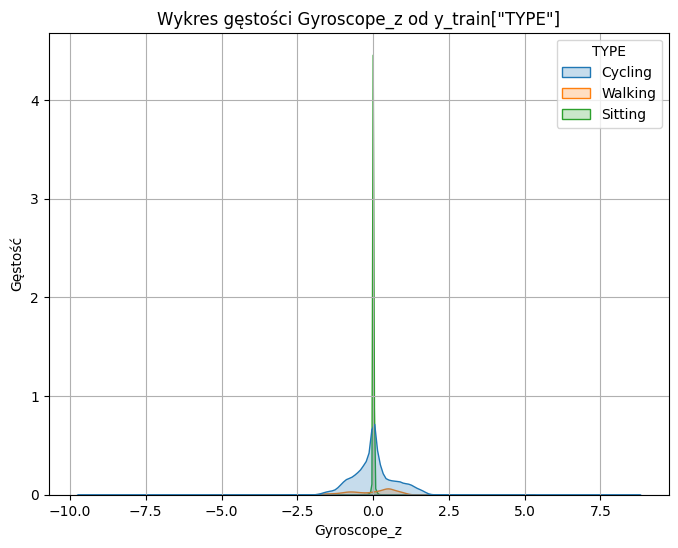

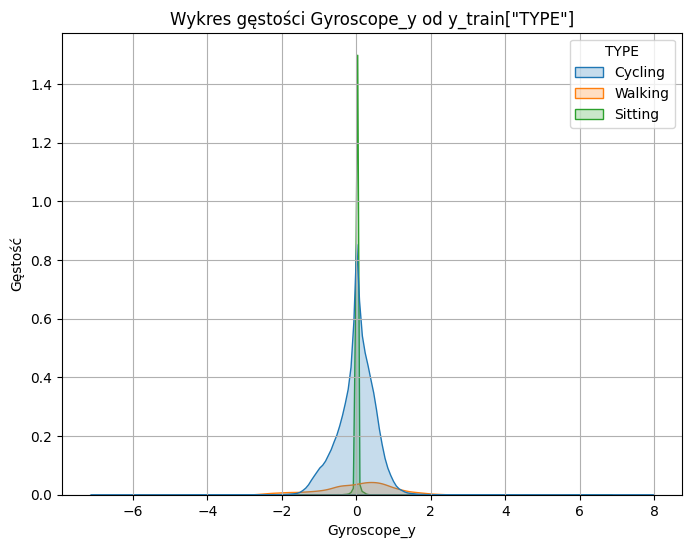

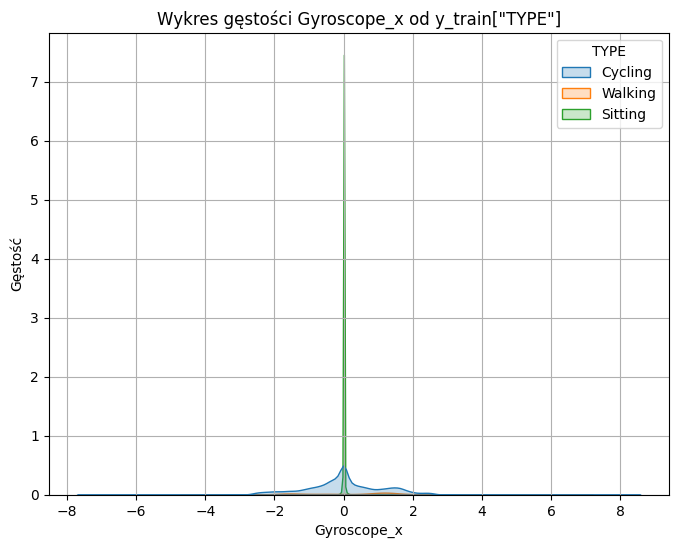

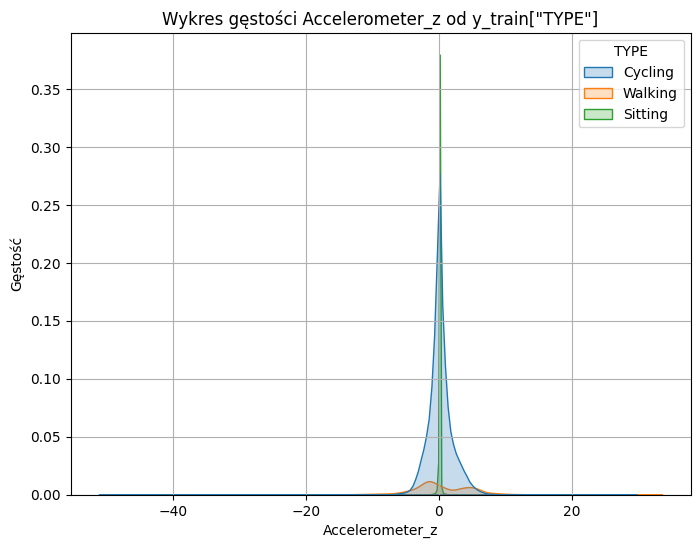

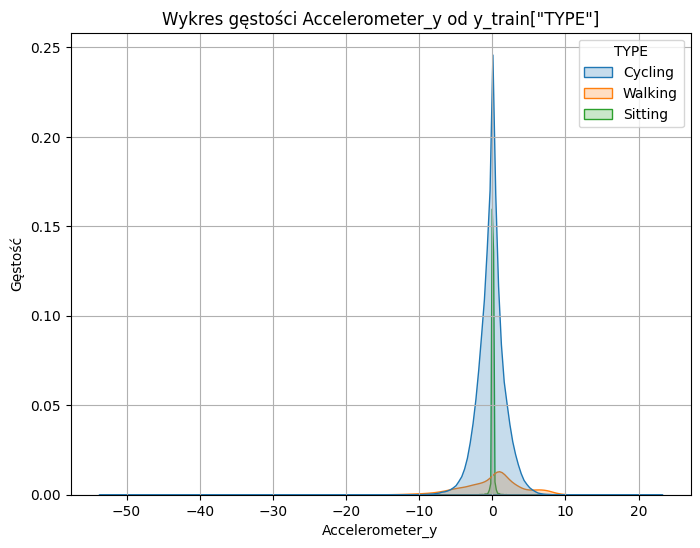

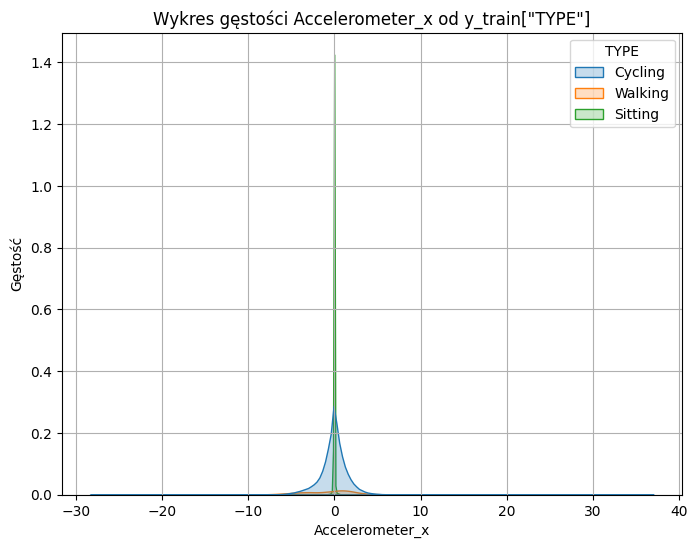

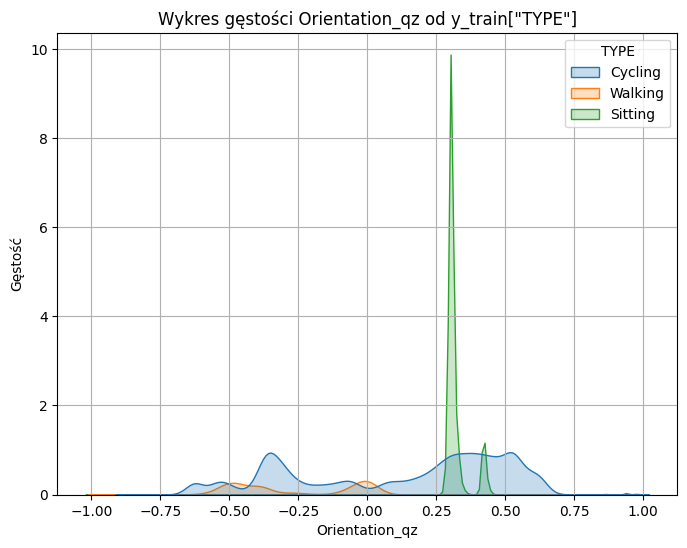

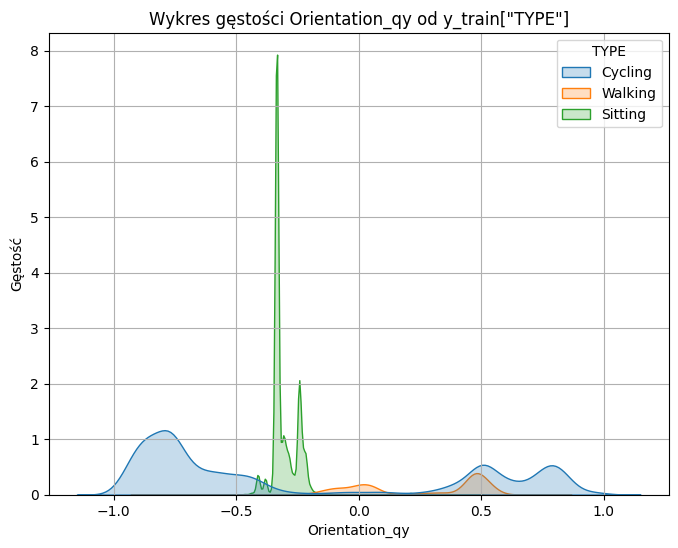

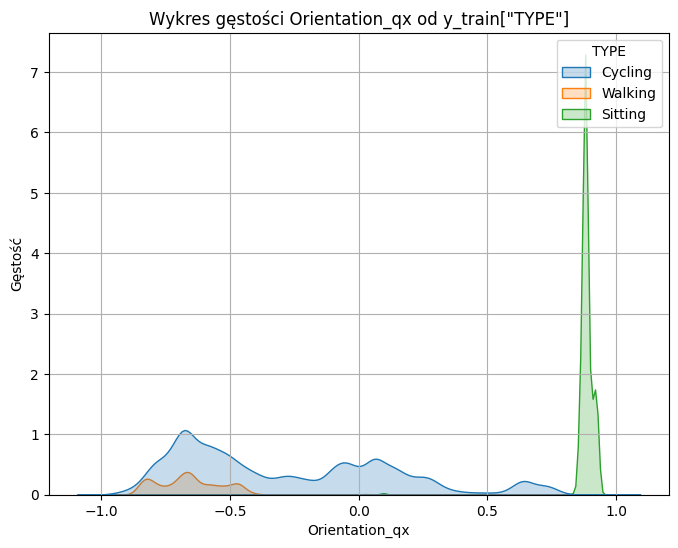

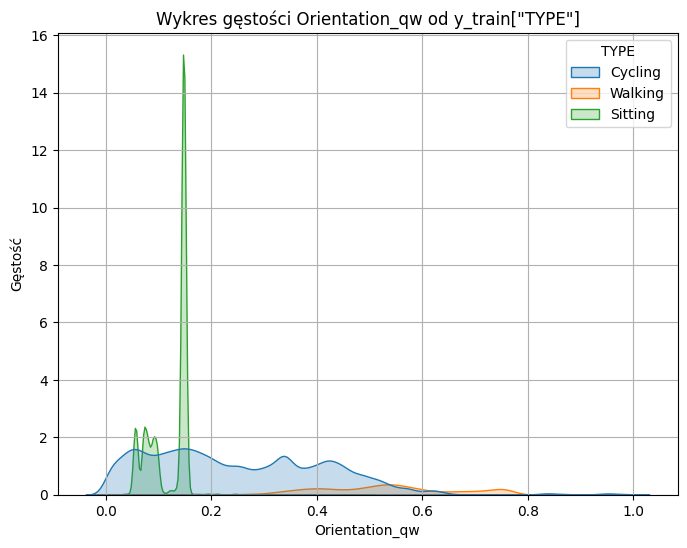

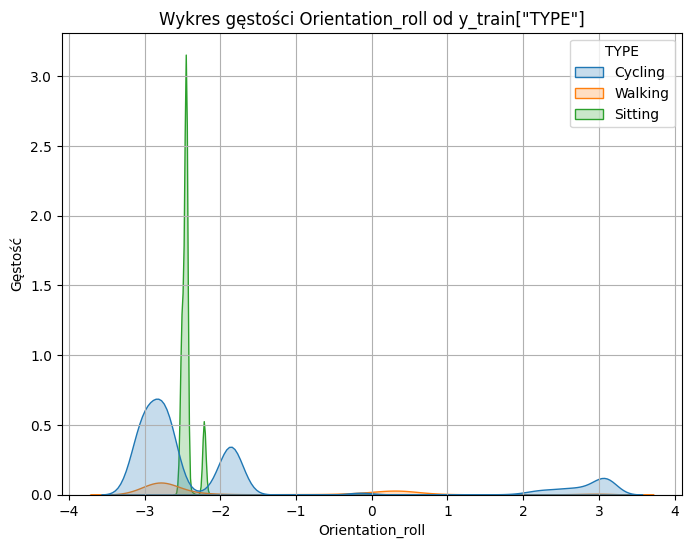

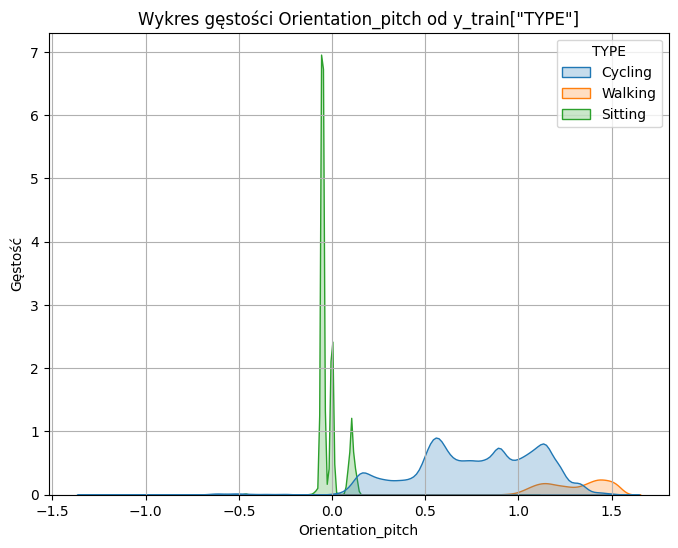

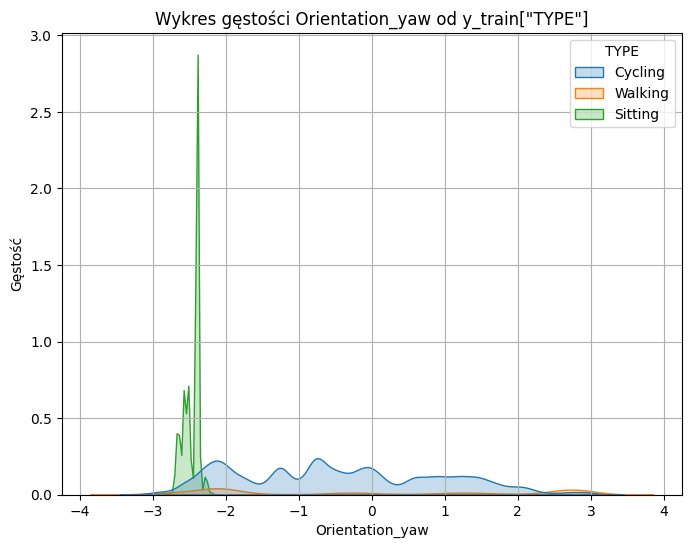

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Przyjmując, że df_original_narrow jest ramką danych, a y_train['TYPE'] to seria
for column in df_original_narrow.columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df_original_narrow, x=column, hue=y_train['TYPE'], fill=True)
    plt.title(f'Wykres gęstości {column} od y_train["TYPE"]')
    plt.xlabel(column)
    plt.ylabel('Gęstość')
    plt.grid(True)
    plt.show()


In [40]:
kmeans.inertia_

123864284529208.67

In [41]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE    Cycling  Sitting  Walking
labels                           
0        118575   102784    56760
1         66348    57494        0
2        200471        0      115

### Standarization and Normalization

In [42]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, normalizer, kmeans)
pipeline.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = pipeline.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
print(labels)


[0 0 1 ... 2 2 0]


In [43]:
kmeans.inertia_

408978.04952328827

In [44]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE    Cycling  Sitting  Walking
labels                           
0        264683       14     4290
1        120379      920    52585
2           332   159344        0

### Normalization and Standarization

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(normalizer, scaler, kmeans)
pipeline.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = pipeline.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
print(labels)

[2 2 0 ... 1 1 2]


In [46]:
kmeans.inertia_

12148858.49692476

In [47]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE    Cycling  Sitting  Walking
labels                           
0        130479      143    56289
1         16176   160120       11
2        238739       15      575

### T-SNE

In [ ]:
colors = []

# Pętla po danych y_train['TYPE'] i przypisanie odpowiednich wartości do wektora colors
for activity in y_train['TYPE']:
    if activity == 'Cycling':
        colors.append(0)
    elif activity == 'Sitting':
        colors.append(1)
    elif activity == 'Walking':
        colors.append(2)

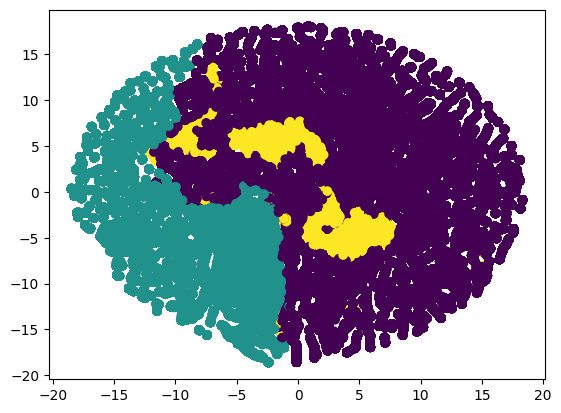

In [58]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_original_narrow.loc[:,(df_original_narrow.columns != 'TYPE') & (df_original_narrow.columns != 'time')])
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=colors)
plt.show()

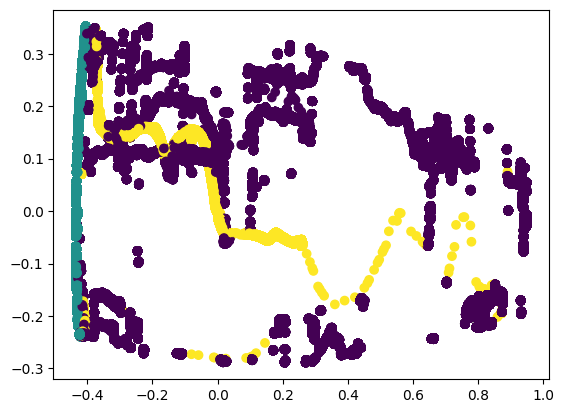

In [56]:
plt.scatter(xs,ys, c = colors)
plt.show()

### Elbow method

Number of clusters: 2, Inertia: 37715931698.70021
Number of clusters: 3, Inertia: 22198284515.919567
Number of clusters: 4, Inertia: 16565041583.71781
Number of clusters: 5, Inertia: 10633489326.020863
Number of clusters: 6, Inertia: 9127289375.42347
Number of clusters: 7, Inertia: 7980726593.440665
Number of clusters: 8, Inertia: 6603754053.561897
Number of clusters: 9, Inertia: 5724928210.909864
Number of clusters: 10, Inertia: 4724592973.354041


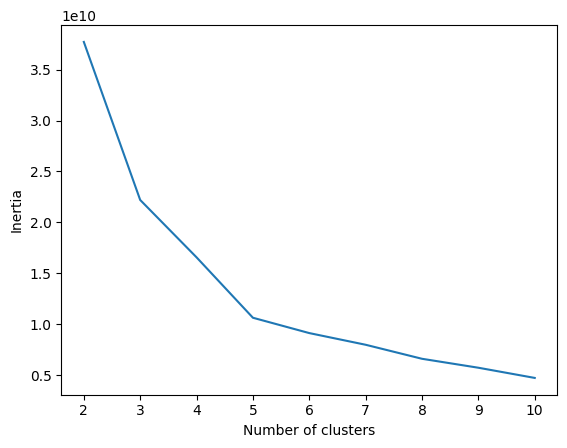

In [19]:
inertias = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(df_original_narrow.loc[:,(df_original_narrow.columns != 'TYPE') & (df_original_narrow.columns != 'time')])
    labels = model.predict(df_original_narrow.loc[:,(df_original_narrow.columns != 'TYPE') & (df_original_narrow.columns != 'time')])
    print(f'Number of clusters: {i}, Inertia: {model.inertia_}')
    inertias.append(model.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



It looks like we have 3 clusters in our data.